# Analysis of Sensor and Lab samples Intermediate Datasets

In [1]:
import os
import sys

sys.path.append("..")

import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats

from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance

from utils.functions.normalize_string import normalize_string

In [2]:
data_folder = os.path.join("..", "data")
utils_folder = os.path.join("..", "utils")

interm_data_folder = os.path.join(data_folder, "Intermediate Data")

In [3]:
# import feature mappings
with open(
    os.path.join(utils_folder, "mappings", "eb0_features_mapping.json")
) as f:
    eb0_features_mapping = json.load(f)

with open(
    os.path.join(utils_folder, "mappings", "eb1_features_mapping.json")
) as f:
    eb1_features_mapping = json.load(f)

# Load Data

In [4]:
eb0_features_lab_df = pd.read_excel(
    os.path.join(interm_data_folder, "EB0_Features_Lab.xlsx")
)

eb0_targets_lab_df = pd.read_excel(
    os.path.join(interm_data_folder, "EB0_Targets_Lab.xlsx")
)

In [5]:
eb1_features_lab_df = pd.read_excel(
    os.path.join(interm_data_folder, "EB1_Features_Lab.xlsx")
)

eb1_targets_lab_df = pd.read_excel(
    os.path.join(interm_data_folder, "EB1_Targets_Lab.xlsx")
)

In [6]:
eb0_sensor_df = pd.read_excel(
    os.path.join(interm_data_folder, "EB0_Sensor.xlsx")
)

In [7]:
eb1_sensor_df = pd.read_excel(
    os.path.join(interm_data_folder, "EB1_Sensor.xlsx")
)

In [8]:
thms_df = pd.read_excel(os.path.join(interm_data_folder, "THMs.xlsx"))

# Lab vs Sensor Data

## EB0

### Features

In [9]:
eb0_features_lab_df.columns = [
    normalize_string(c) for c in eb0_features_lab_df.columns
]

eb0_features_mapping = {
    normalize_string(k): v for k, v in eb0_features_mapping.items()
}

#### Histograms

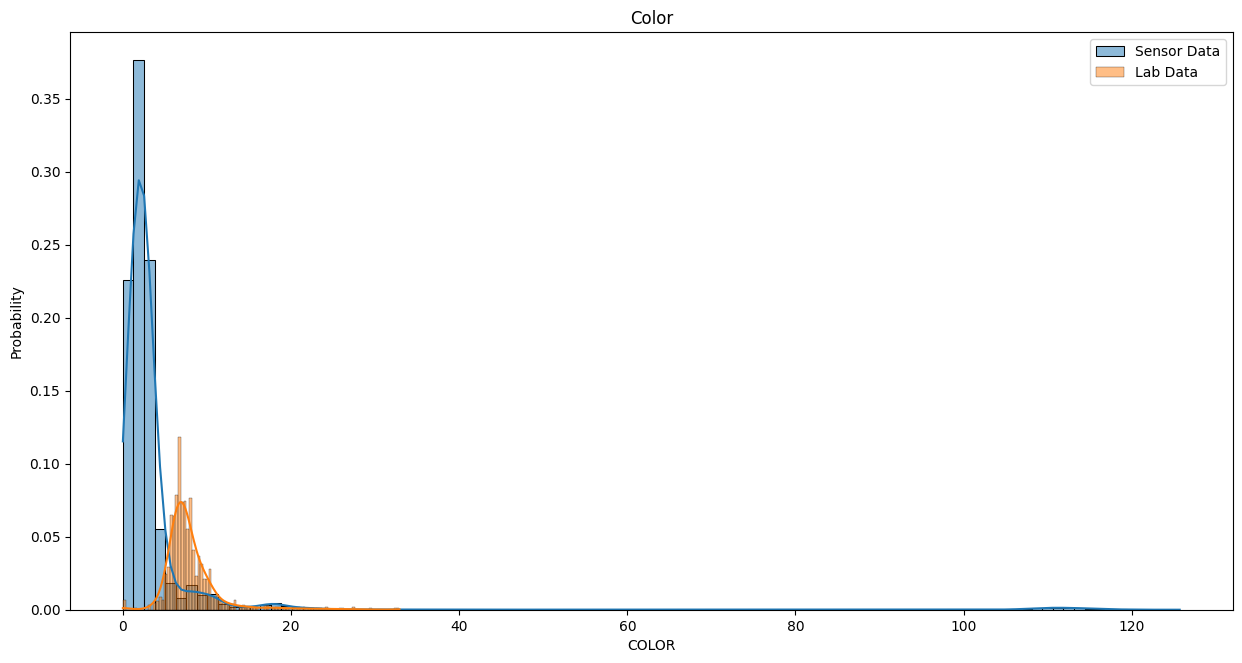

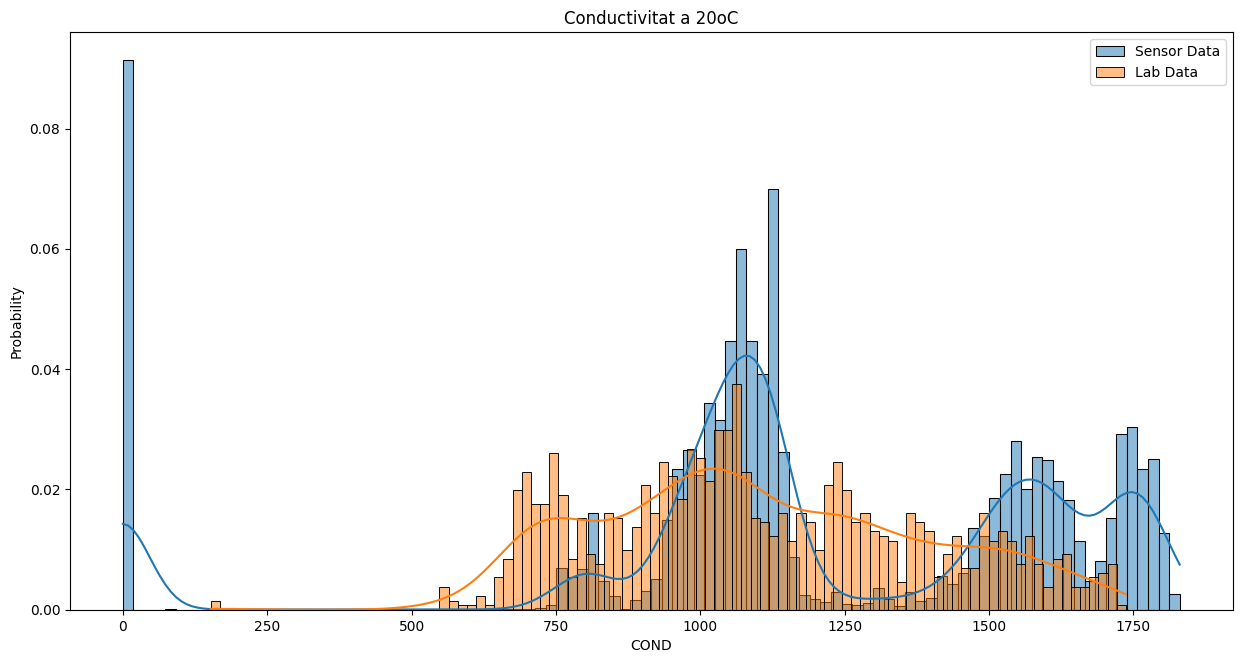

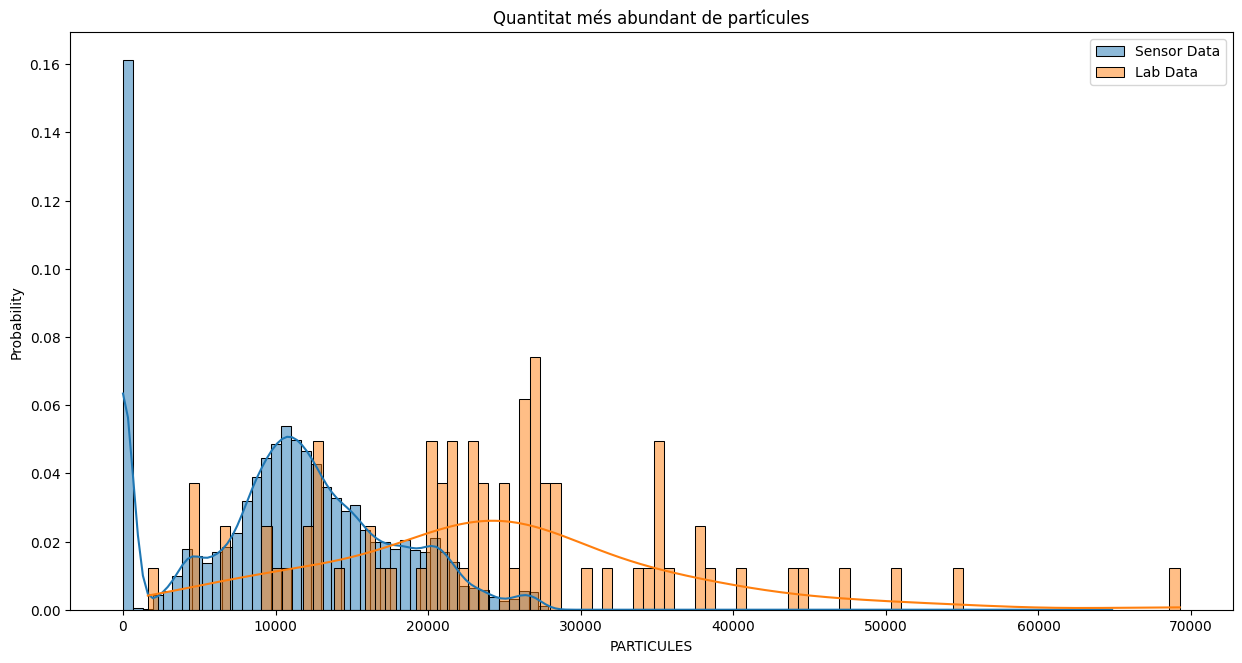

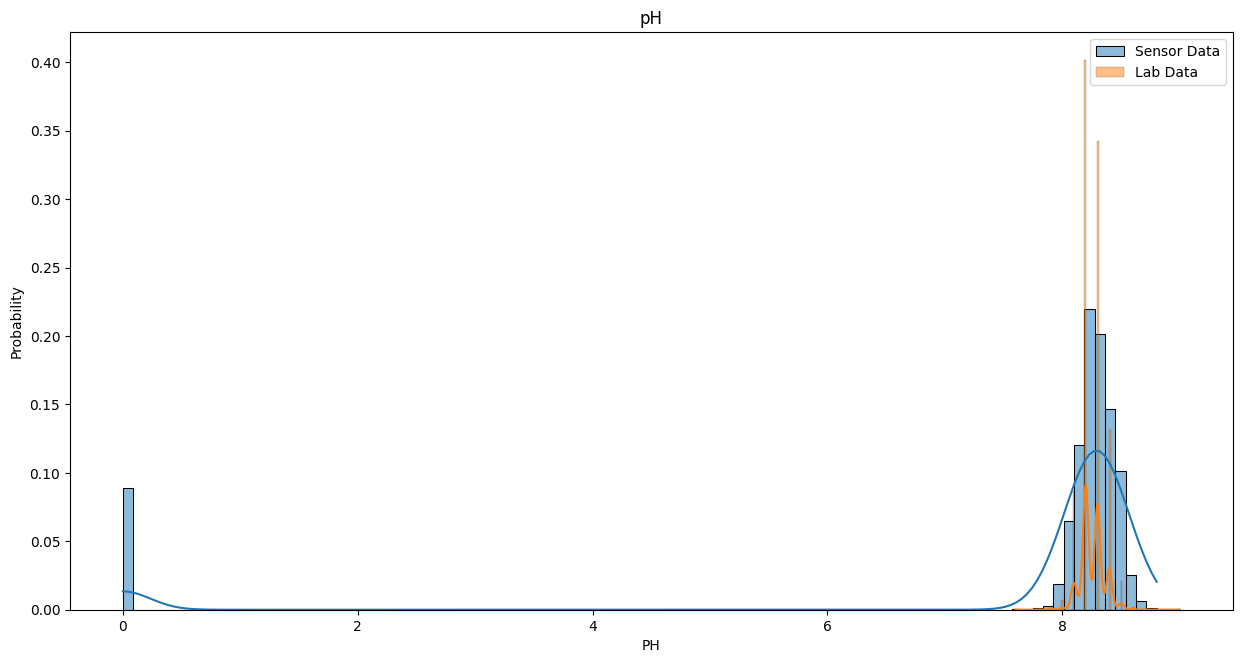

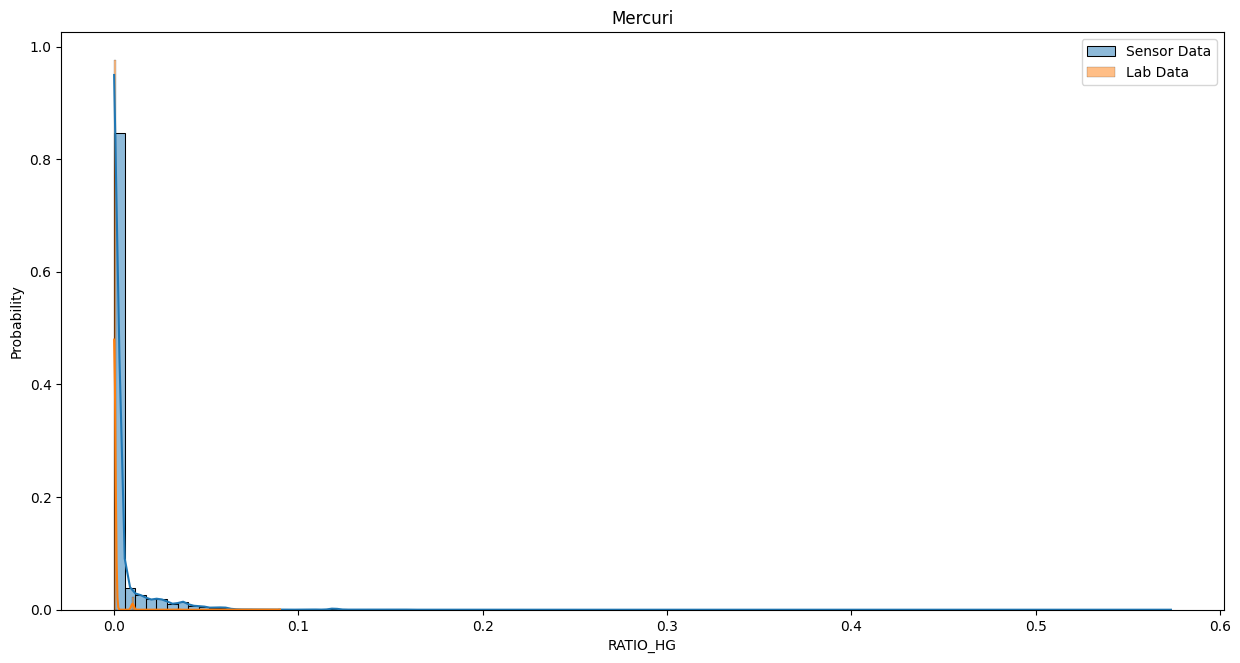

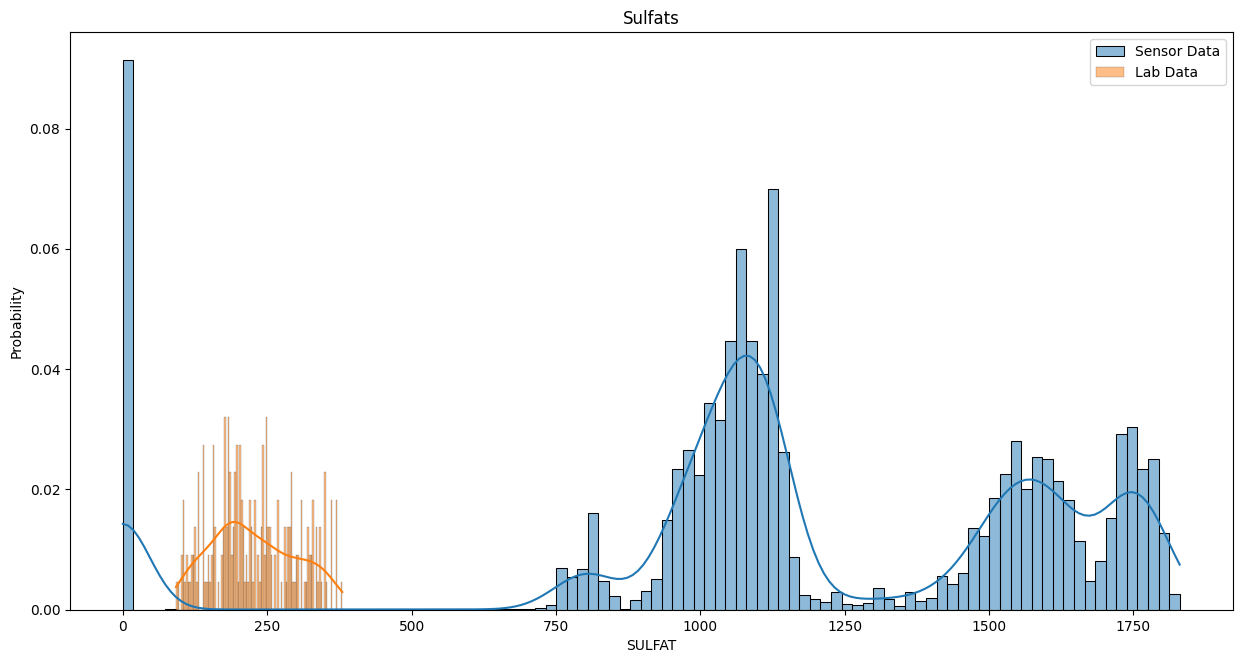

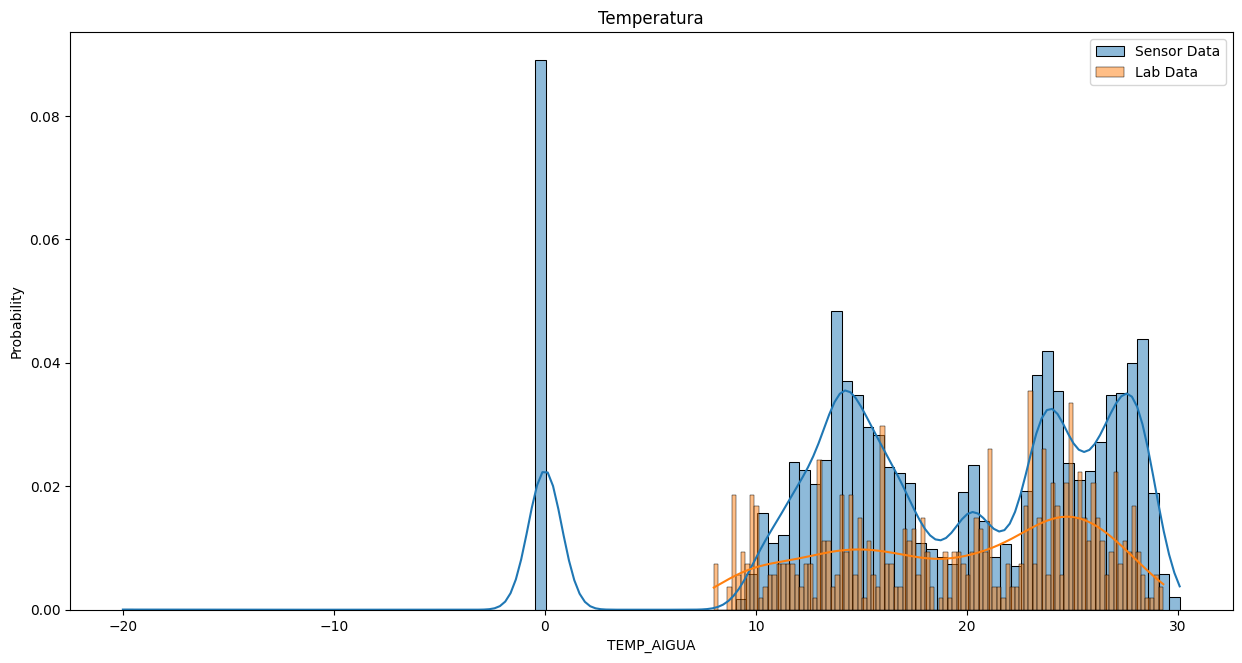

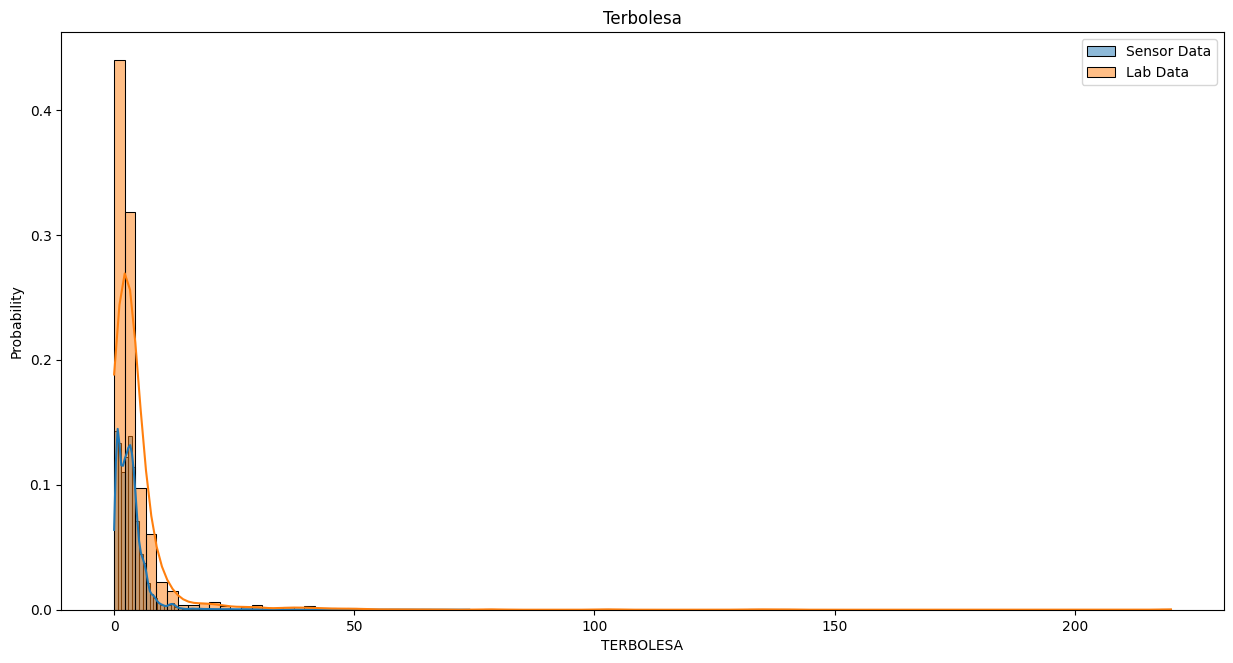

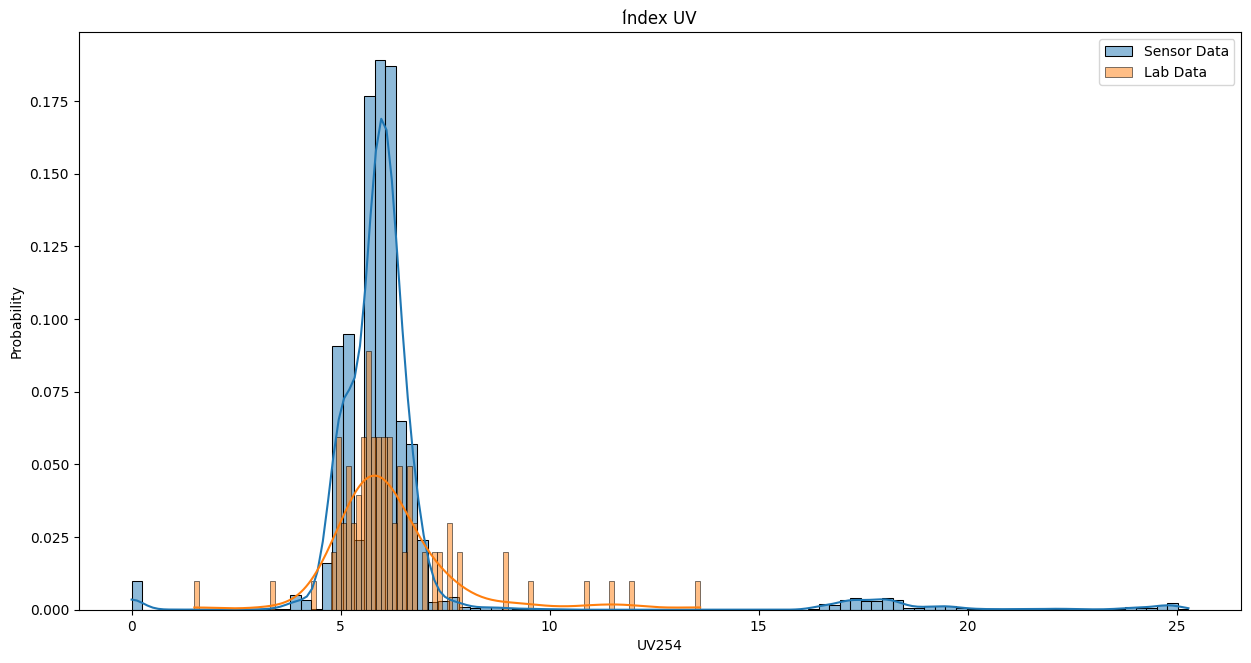

In [10]:
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[lab_key]
    sensor_df = eb0_sensor_df[sensor_key]

    # remove 0 values from sensor data
    # sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:
        plt.figure(figsize=(15, 7.5))

        sns.histplot(
            data=sensor_df,
            kde=True,
            bins=100,
            alpha=0.5,
            stat="probability",
            label="Sensor Data",
        )

        sns.histplot(
            data=lab_df,
            kde=True,
            bins=100,
            stat="probability",
            label="Lab Data",
        )

        plt.title(lab_key)
        plt.legend()
        plt.show()

        # The y-axis of a histplot with stat="probability" corresponds
        # to the probability that a value belongs to a certain bar.
        # The sum of the bar heights must be 1.

#### Boxplots

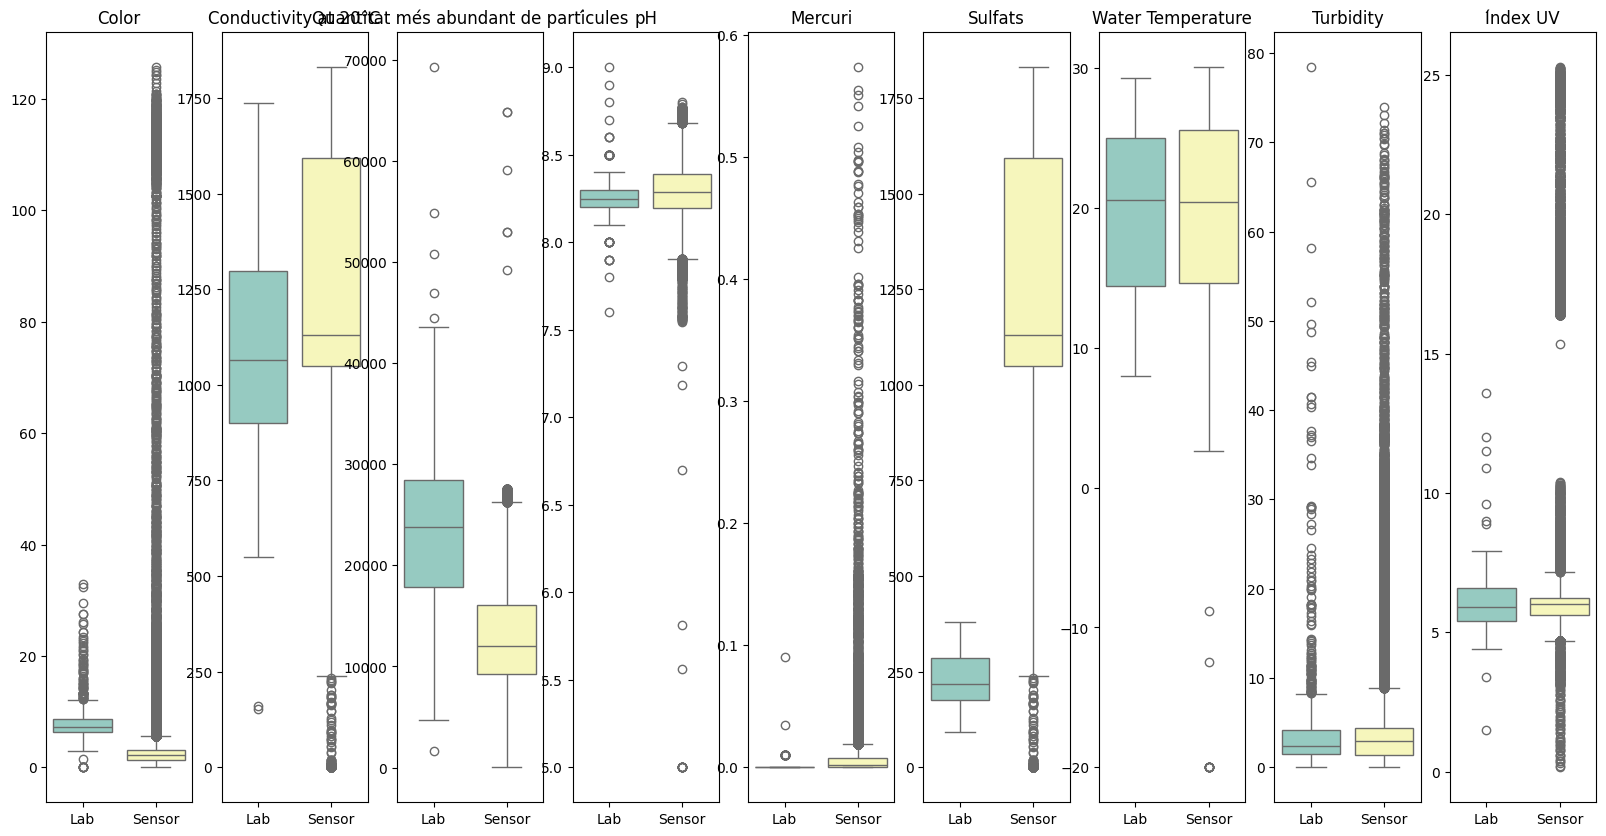

In [11]:
fix, axs = plt.subplots(1, len(eb0_features_mapping), figsize=(20, 10))

for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[lab_key]
    sensor_df = eb0_sensor_df[sensor_key]

    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    title = lab_key

    if lab_key == "Conductivitat a 20oC":
        title = "Conductivity at 20°C"

    elif lab_key == "Temperatura":
        title = "Water Temperature"

    elif lab_key == "Terbolesa":
        title = "Turbidity"
        lab_df = lab_df[lab_df < 100]

    if not lab_df.empty and not sensor_df.empty:
        lab_df.name = "Lab"
        sensor_df.name = "Sensor"

        sns.boxplot(
            data=[lab_df, sensor_df],
            palette="Set3",
            ax=axs[list(eb0_features_mapping.keys()).index(lab_key)],
        )

        axs[list(eb0_features_mapping.keys()).index(lab_key)].set_title(title)

plt.show()

#### Time series

Lab Color Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor COLOR Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Color Count: 1032
Sensor COLOR Count: 107396

Lab Color % Missing: 25.49%
Sensor COLOR % Missing: 0.99%



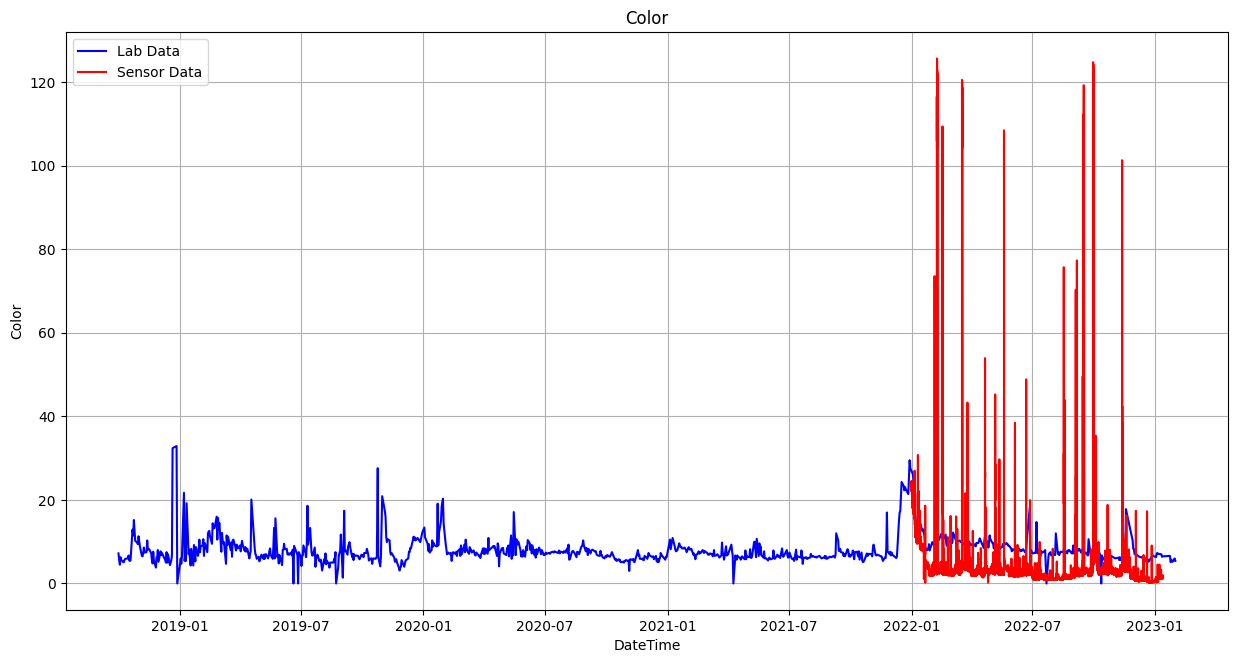

Lab Conductivitat a 20oC Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor COND Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Conductivitat a 20oC Count: 1306
Sensor COND Count: 98717

Lab Conductivitat a 20oC % Missing: 5.70%
Sensor COND % Missing: 8.99%



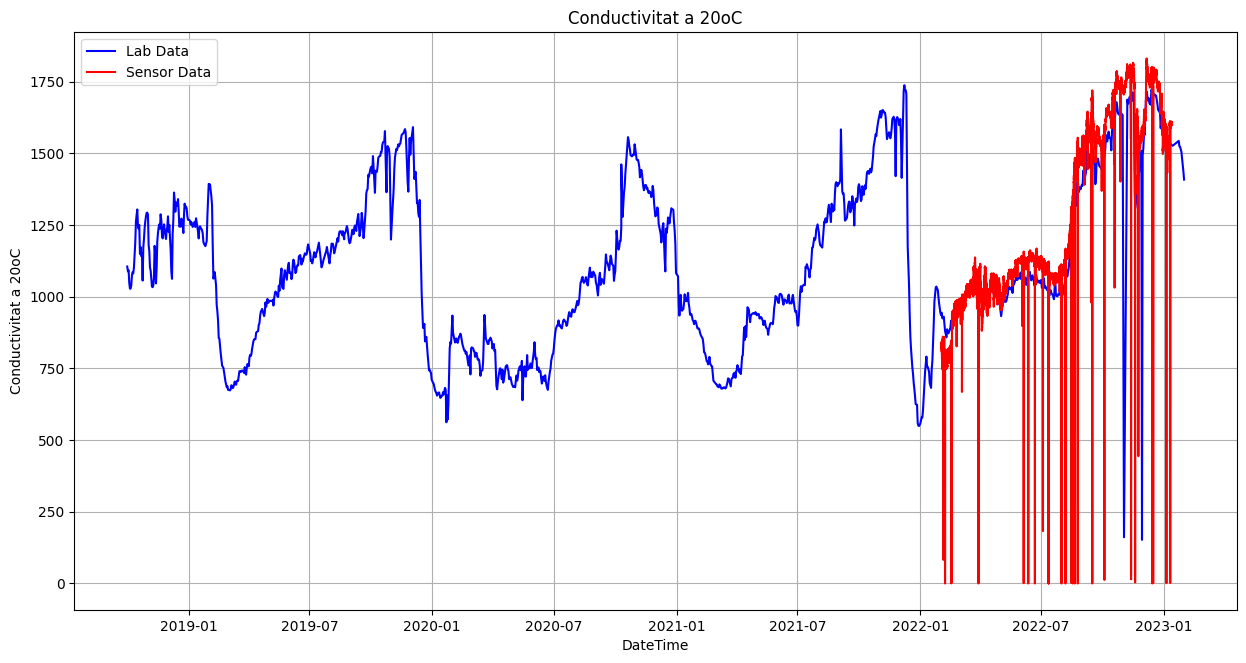

Lab Quantitat més abundant de partícules Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor PARTICULES Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Quantitat més abundant de partícules Count: 81
Sensor PARTICULES Count: 91197

Lab Quantitat més abundant de partícules % Missing: 94.15%
Sensor PARTICULES % Missing: 15.92%



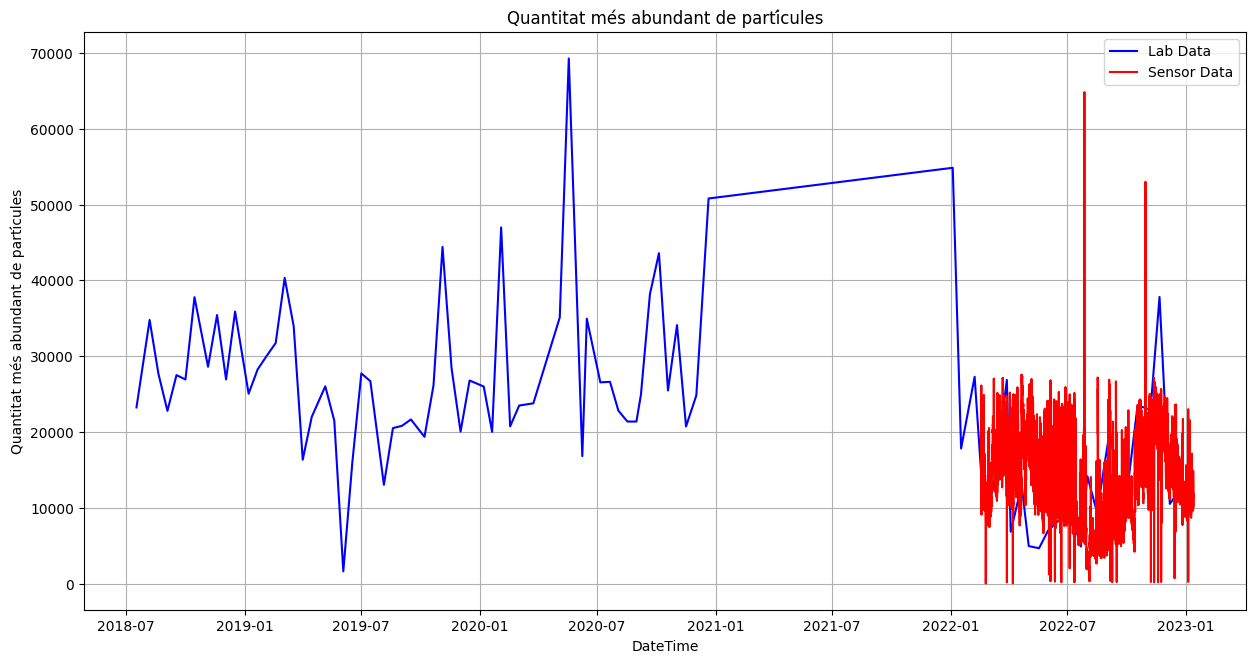

Lab pH Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor PH Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab pH Count: 1306
Sensor PH Count: 98801

Lab pH % Missing: 5.70%
Sensor PH % Missing: 8.91%



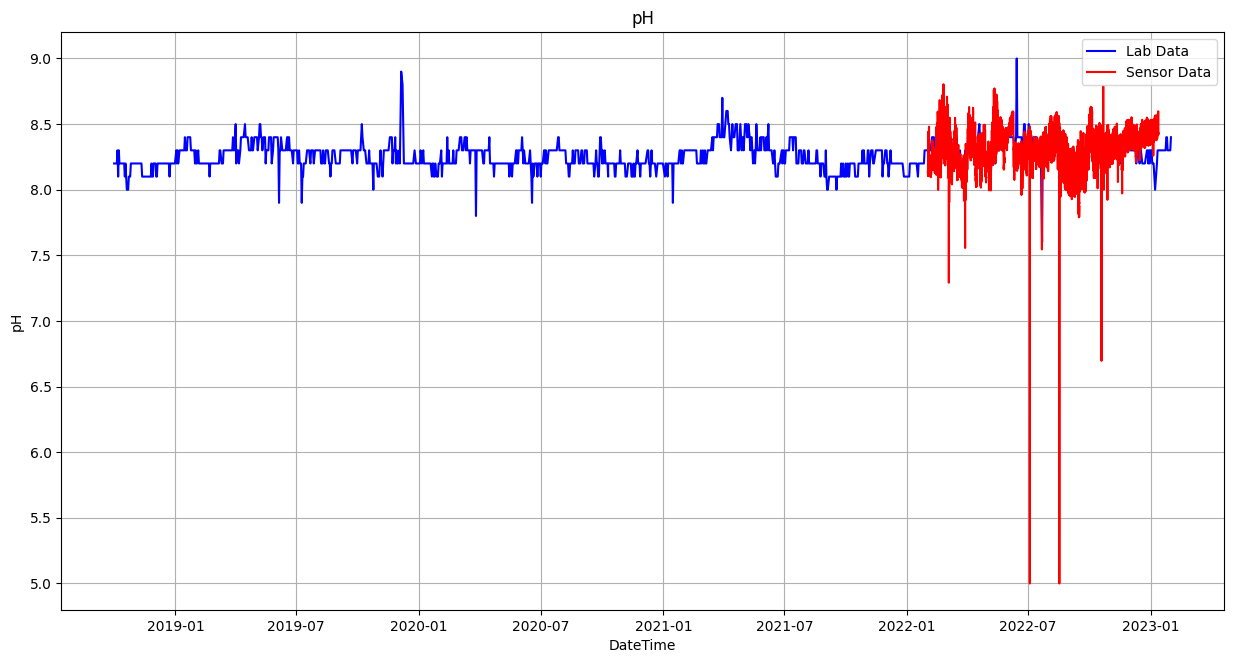

Lab Mercuri Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor RATIO_HG Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Mercuri Count: 1283
Sensor RATIO_HG Count: 59045

Lab Mercuri % Missing: 7.36%
Sensor RATIO_HG % Missing: 45.57%



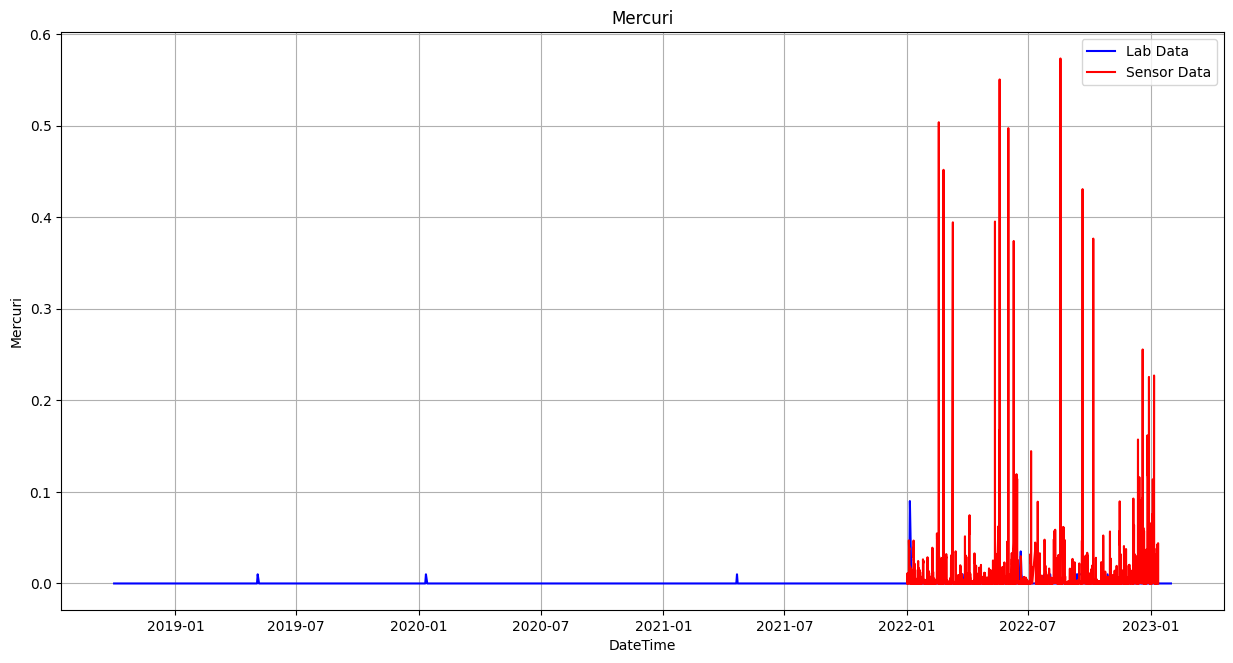

Lab Sulfats Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor SULFAT Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Sulfats Count: 219
Sensor SULFAT Count: 98718

Lab Sulfats % Missing: 84.19%
Sensor SULFAT % Missing: 8.99%



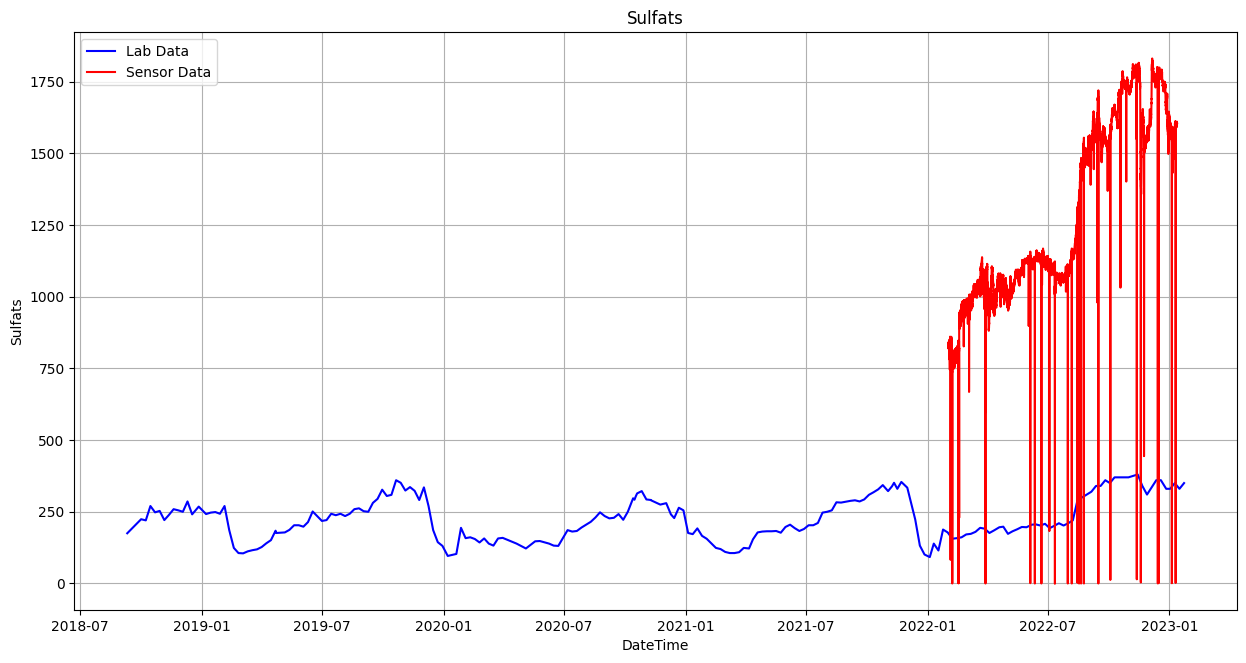

Lab Temperatura Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor TEMP_AIGUA Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Temperatura Count: 537
Sensor TEMP_AIGUA Count: 98803

Lab Temperatura % Missing: 61.23%
Sensor TEMP_AIGUA % Missing: 8.91%



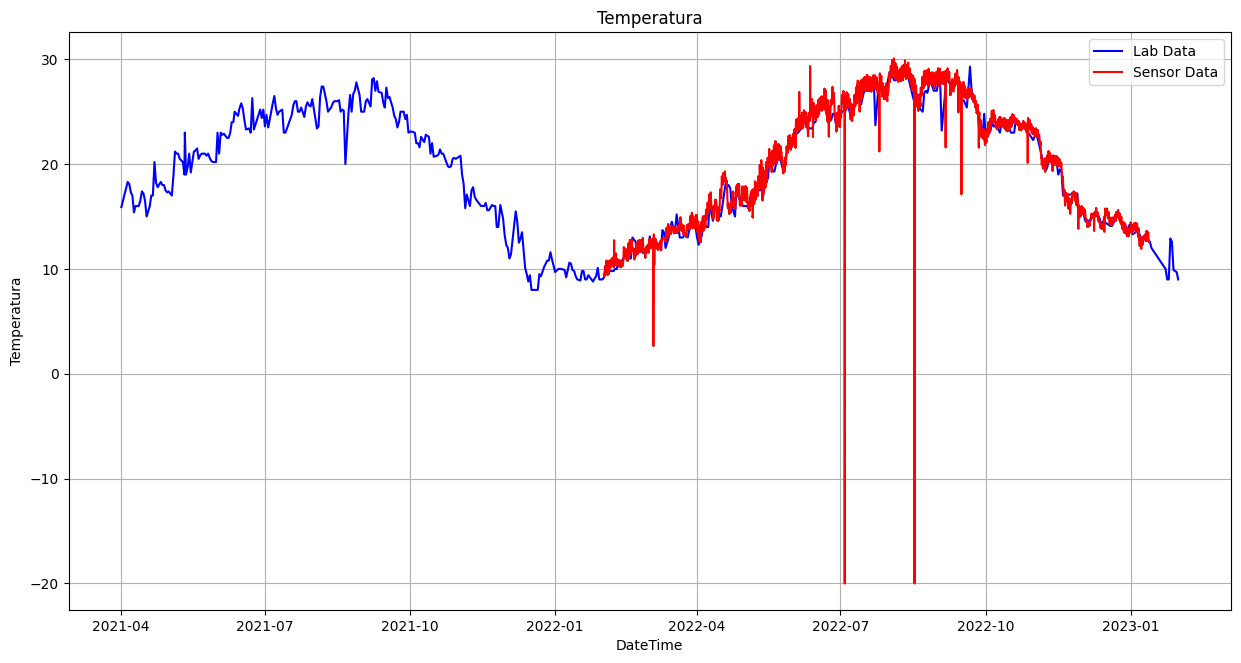

Lab Terbolesa Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor TERBOLESA Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Terbolesa Count: 1306
Sensor TERBOLESA Count: 107390

Lab Terbolesa % Missing: 5.70%
Sensor TERBOLESA % Missing: 0.99%



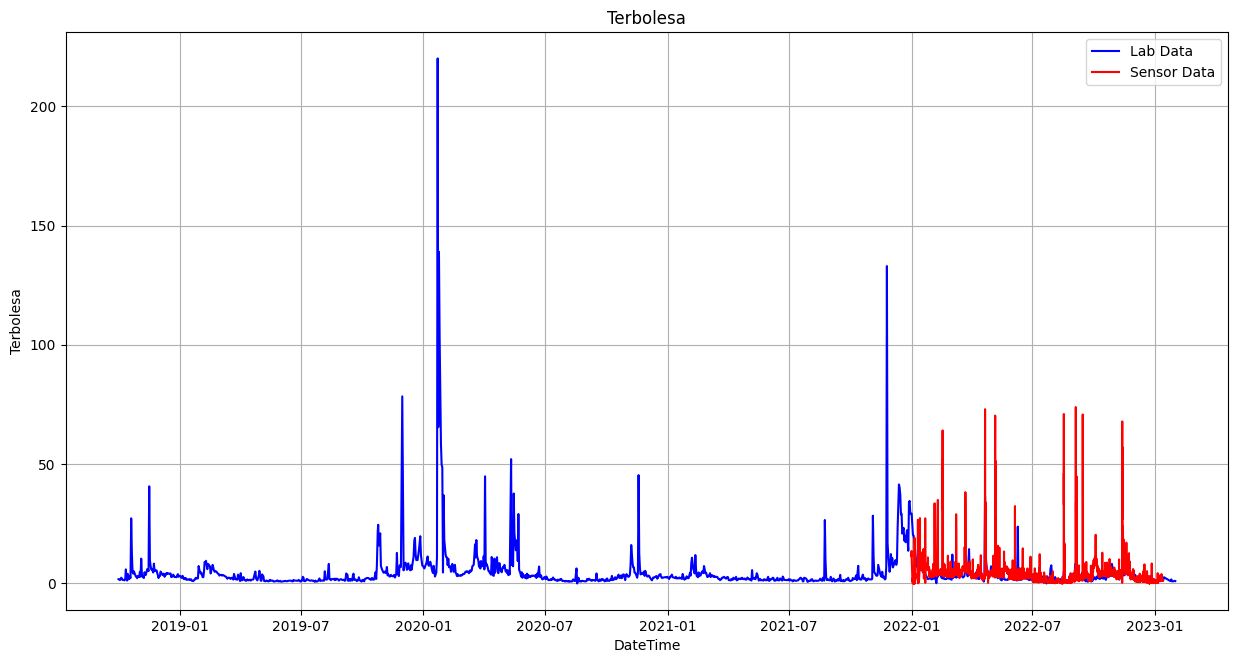

Lab Índex UV Date Range: 2018-07-17 03:00:00 - 2023-01-31 03:30:00
Sensor UV254 Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Índex UV Count: 101
Sensor UV254 Count: 106771

Lab Índex UV % Missing: 92.71%
Sensor UV254 % Missing: 1.57%



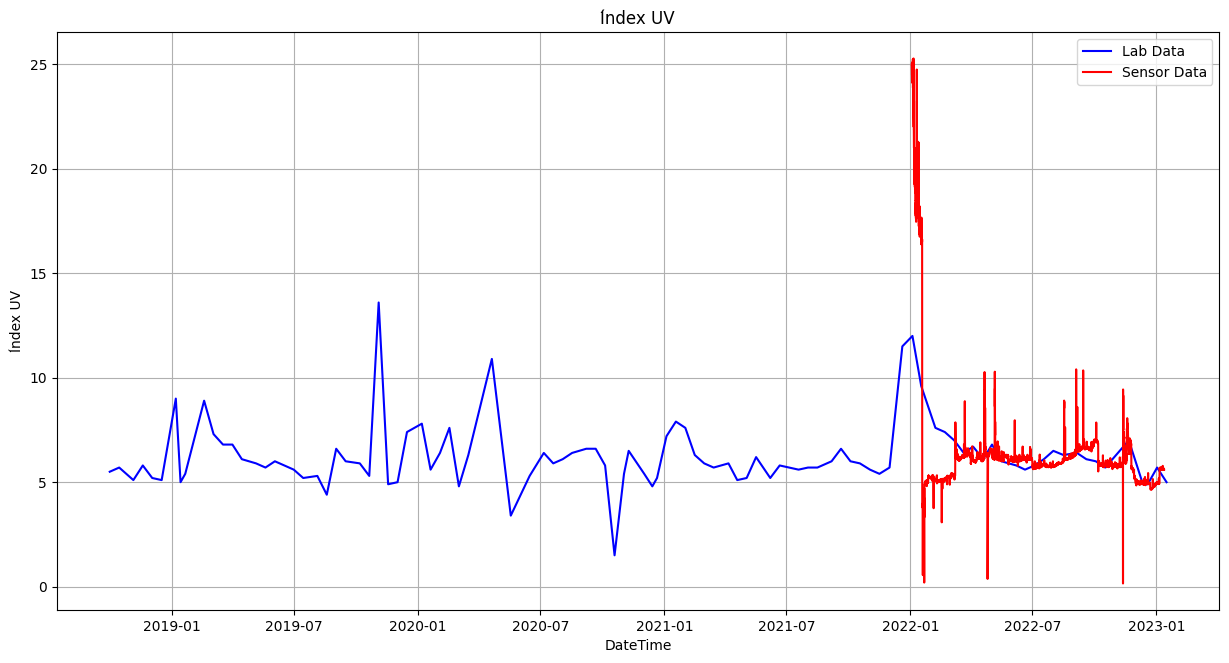

In [12]:
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[["DateTime", lab_key]]
    sensor_df = eb0_sensor_df[["DateTime", sensor_key]]

    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    # print date range for both lab and sensor data
    print(
        f"Lab {lab_key} Date Range: {lab_df['DateTime'].min()} - {lab_df['DateTime'].max()}"
    )
    print(
        f"Sensor {sensor_key} Date Range: {sensor_df['DateTime'].min()} - {sensor_df['DateTime'].max()}"
    )
    print()
    # print count of values for both lab and sensor data
    print(f"Lab {lab_key} Count: {lab_df[lab_key].count()}")
    print(f"Sensor {sensor_key} Count: {sensor_df[sensor_key].count()}")
    print()

    # print % missing values for both lab and sensor data
    print(
        f"Lab {lab_key} % Missing: {lab_df[lab_key].isna().sum() / lab_df[lab_key].shape[0] * 100:.2f}%"
    )
    print(
        f"Sensor {sensor_key} % Missing: {sensor_df[sensor_key].isna().sum() / sensor_df[sensor_key].shape[0] * 100:.2f}%"
    )
    print()

    if not lab_df.empty and not sensor_df.empty:
        plt.figure(figsize=(15, 7.5))

        sns.lineplot(
            x="DateTime",
            y=lab_key,
            data=lab_df,
            color="blue",
            label="Lab Data",
        )

        sns.lineplot(
            x="DateTime",
            y=sensor_key,
            data=sensor_df,
            color="red",
            label="Sensor Data",
        )

        plt.title(lab_key)
        plt.legend()
        plt.grid(True)
        plt.show()

#### Retrieve Common Time Range data + Hypothesis Tests

In [13]:
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/safecrew-3OLHM_8n-py3.12/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [14]:
from sklearn.discriminant_analysis import StandardScaler


ks_hypothesis_tests = {}
t_hypothesis_tests = {}
u_hypothesis_tests = {}
dwt_distances = {}

scaler = StandardScaler()

# get common time range samples for lab and sensor data
for lab_key, sensor_key in eb0_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb0_features_lab_df[["DateTime", lab_key]]
    sensor_df = eb0_sensor_df[["DateTime", sensor_key]]

    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:
        lab_time_range_df = lab_df[
            (lab_df["DateTime"] >= sensor_df["DateTime"].min())
            & (lab_df["DateTime"] <= sensor_df["DateTime"].max())
        ]

        sensor_time_range_df = sensor_df[
            (sensor_df["DateTime"] >= lab_df["DateTime"].min())
            & (sensor_df["DateTime"] <= lab_df["DateTime"].max())
        ]

        # plt.figure(figsize=(15, 7.5))

        # sns.lineplot(
        #     x="DateTime",
        #     y=lab_key,
        #     data=lab_time_range_df,
        #     color="blue",
        #     label="Lab Data",
        # )

        # sns.lineplot(
        #     x="DateTime",
        #     y=sensor_key,
        #     data=sensor_time_range_df,
        #     color="red",
        #     label="Sensor Data",
        # )

        # two sample KS test
        ks_result, ks_p_value = stats.ks_2samp(
            lab_df[lab_key], sensor_df[sensor_key]
        )
        t_result, t_p_value = stats.ttest_ind(
            lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna()
        )
        u_result, u_p_value = stats.mannwhitneyu(
            lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna()
        )

        ks_hypothesis_tests[lab_key] = {
            "ks_test": ks_result,
            "p_value": ks_p_value,
        }

        t_hypothesis_tests[lab_key] = {"t_test": t_result, "p_value": t_p_value}

        u_hypothesis_tests[lab_key] = {"u_test": u_result, "p_value": u_p_value}

        scaled_lab = pd.DataFrame(
            scaler.fit_transform(lab_df[lab_key].dropna().values.reshape(-1, 1))
        )
        scaled_sensor = pd.DataFrame(
            scaler.fit_transform(
                sensor_df[sensor_key].dropna().values.reshape(-1, 1)
            )
        )

        # print date range for both lab and sensor data
        print(
            f"Lab {lab_key} Date Range: {lab_time_range_df['DateTime'].min()} - {lab_time_range_df['DateTime'].max()}"
        )
        print(
            f"Sensor {sensor_key} Date Range: {sensor_time_range_df['DateTime'].min()} - {sensor_time_range_df['DateTime'].max()}"
        )
        print()
        # print count of values for both lab and sensor data
        print(f"Lab {lab_key} Count: {lab_time_range_df[lab_key].count()}")
        print(
            f"Sensor {sensor_key} Count: {sensor_time_range_df[sensor_key].count()}"
        )
        print()

        # print % missing values for both lab and sensor data
        print(
            f"Lab {lab_key} % Missing: {lab_time_range_df[lab_key].isna().sum() / lab_time_range_df[lab_key].shape[0] * 100:.2f}%"
        )
        print(
            f"Sensor {sensor_key} % Missing: {sensor_time_range_df[sensor_key].isna().sum() / sensor_time_range_df[sensor_key].shape[0] * 100:.2f}%"
        )
        print()

        dwt_distance = dtw(
            scaled_lab,
            scaled_sensor,
        )

        dwt_distances[lab_key] = dwt_distance

        # plt.title(lab_key)
        # plt.grid(True)
        # plt.legend()
        # plt.show()

Lab Color Date Range: 2022-01-01 04:15:00 - 2023-01-11 04:00:00
Sensor COLOR Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Color Count: 238
Sensor COLOR Count: 107396

Lab Color % Missing: 25.86%
Sensor COLOR % Missing: 0.99%

Lab Conductivitat a 20oC Date Range: 2022-01-01 04:15:00 - 2023-01-11 04:00:00
Sensor COND Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Conductivitat a 20oC Count: 299
Sensor COND Count: 98717

Lab Conductivitat a 20oC % Missing: 6.85%
Sensor COND % Missing: 8.99%

Lab Quantitat més abundant de partícules Date Range: 2022-01-01 04:15:00 - 2023-01-11 04:00:00
Sensor PARTICULES Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

Lab Quantitat més abundant de partícules Count: 23
Sensor PARTICULES Count: 91197

Lab Quantitat més abundant de partícules % Missing: 92.83%
Sensor PARTICULES % Missing: 15.92%

Lab pH Date Range: 2022-01-01 04:15:00 - 2023-01-11 04:00:00
Sensor PH Date Range: 2022-01-01 00:00:00 - 2023-01-12 15:00:00

L

In [17]:
pd.DataFrame(dwt_distances, index=[0])

,Color,Conductivitat a 20oC,pH,Temperatura,Terbolesa
0,118.323486,63.938999,170.206105,48.164189,170.361719


In [18]:
pd.DataFrame(ks_hypothesis_tests).T

,ks_test,p_value
Color,NaN,NaN
Conductivitat a 20oC,NaN,NaN
pH,NaN,NaN
Temperatura,NaN,NaN
Terbolesa,NaN,NaN


In [19]:
pd.DataFrame(t_hypothesis_tests).T

,t_test,p_value
Color,10.715423,8.886662e-27
Conductivitat a 20oC,-21.665059,7.607492e-104
pH,-7.844450,4.391186e-15
Temperatura,-2.278200,2.271680e-02
Terbolesa,8.904384,5.448470e-19


In [20]:
pd.DataFrame(u_hypothesis_tests).T

,u_test,p_value
Color,101860511.0,0.000000e+00
Conductivitat a 20oC,42467535.0,6.623713e-100
pH,53975056.0,2.967042e-24
Temperatura,24843559.0,1.100535e-02
Terbolesa,70296559.0,8.794909e-01


#### Distributions Divergence

In [21]:
kl_divs = {}
js_divs = {}
tv_dists = {}
w_dists = {}

for lab_key, sensor_key in eb0_features_mapping.items():
    # Compute the probability distribution of the feature in each DataFrame
    lab_df = eb0_features_lab_df[lab_key]
    sensor_df = eb0_sensor_df[sensor_key]

    lab_pdist = np.histogram(lab_df.dropna(), bins=100, density=True)[0]
    sensor_pdist = np.histogram(sensor_df.dropna(), bins=100, density=True)[0]

    # Add a small constant to avoid division by zero
    lab_pdist = lab_pdist + np.finfo(np.float64).eps
    sensor_pdist = sensor_pdist + np.finfo(np.float64).eps

    # Compute divergence metrics
    kl_div = stats.entropy(lab_pdist, sensor_pdist)
    js_div = jensenshannon(lab_pdist, sensor_pdist)
    tv_dist = np.sum(np.abs(lab_pdist - sensor_pdist)) / 2
    w_dist = wasserstein_distance(lab_pdist, sensor_pdist)

    kl_divs[lab_key] = kl_div
    js_divs[lab_key] = js_div
    tv_dists[lab_key] = tv_dist
    w_dists[lab_key] = w_dist


kl_divs = pd.Series(kl_divs)
js_divs = pd.Series(js_divs)
tv_dists = pd.Series(tv_dists)
w_dists = pd.Series(w_dists)

In [22]:
kl_divs

Color                    4.983642
Conductivitat a 20oC     1.505864
pH                      36.980509
Temperatura             14.515220
Terbolesa                0.609899
dtype: float64

In [23]:
js_divs

Color                   0.797124
Conductivitat a 20oC    0.447123
pH                      0.829355
Temperatura             0.536685
Terbolesa               0.398156
dtype: float64

In [24]:
tv_dists

Color                    1.871335
Conductivitat a 20oC     0.027198
pH                      41.269375
Temperatura              2.070115
Terbolesa                0.456851
dtype: float64

In [25]:
w_dists

Color                   0.022467
Conductivitat a 20oC    0.000290
pH                      0.627454
Temperatura             0.027216
Terbolesa               0.009119
dtype: float64

### Targets

## EB1

### Features

In [26]:
eb1_features_lab_df.columns = [
    normalize_string(c) for c in eb1_features_lab_df.columns
]

eb1_features_mapping = {
    normalize_string(k): v for k, v in eb1_features_mapping.items()
}

#### Histograms

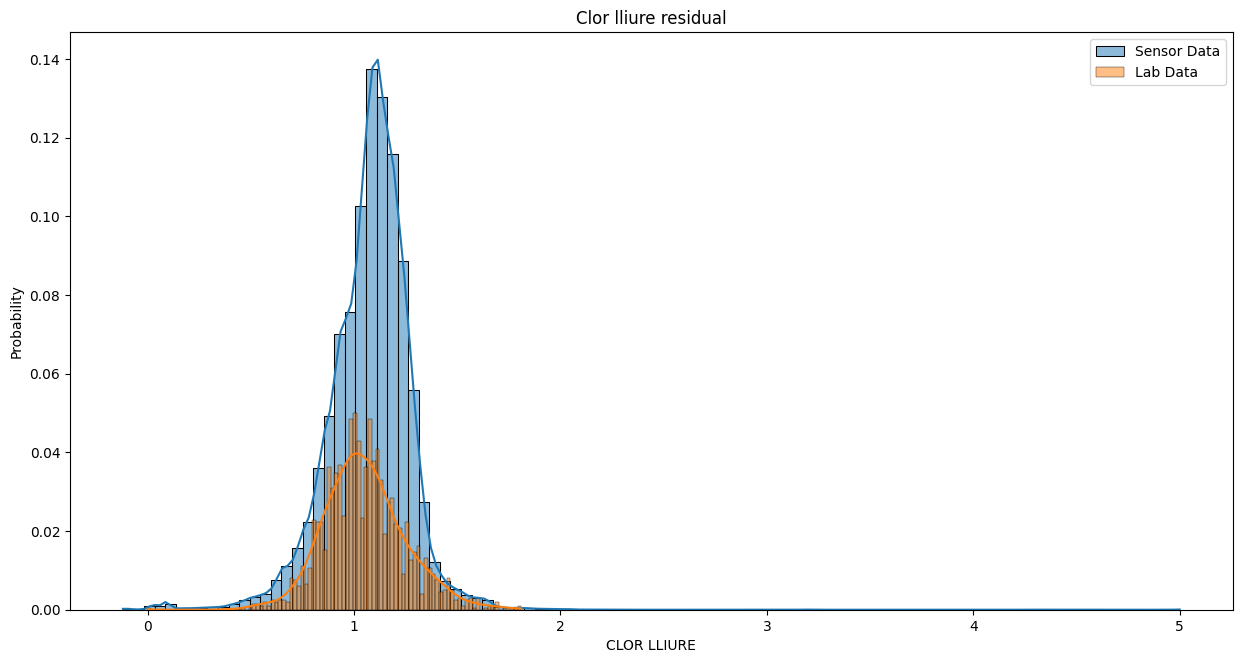

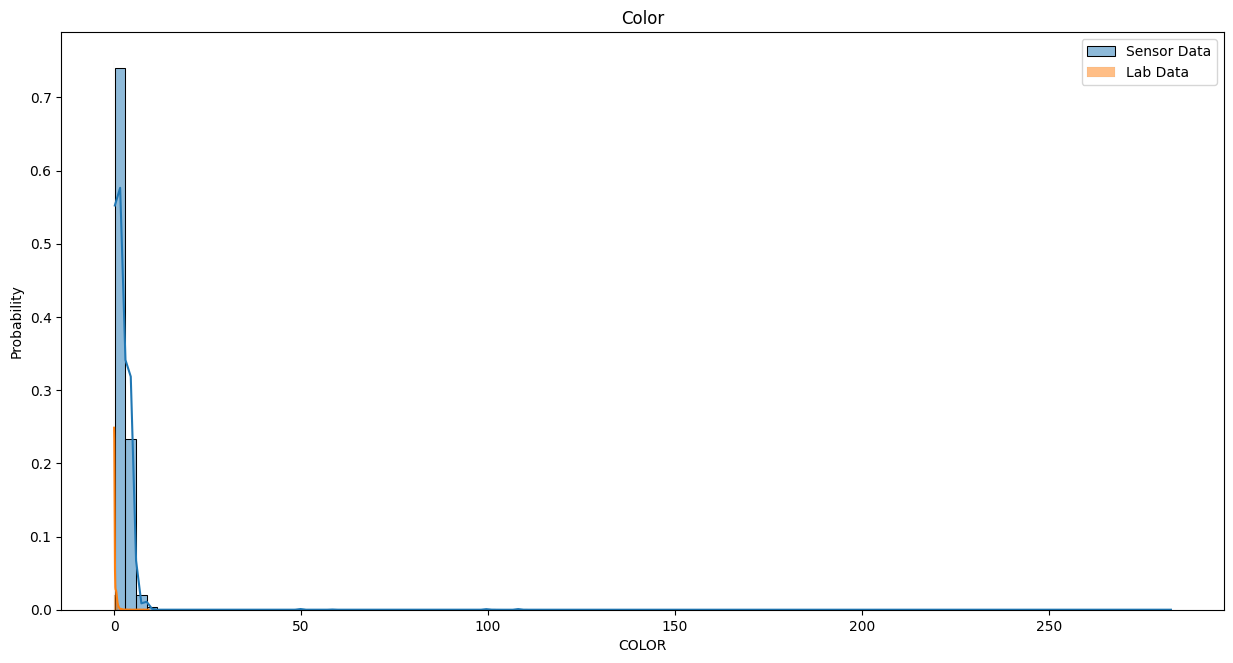

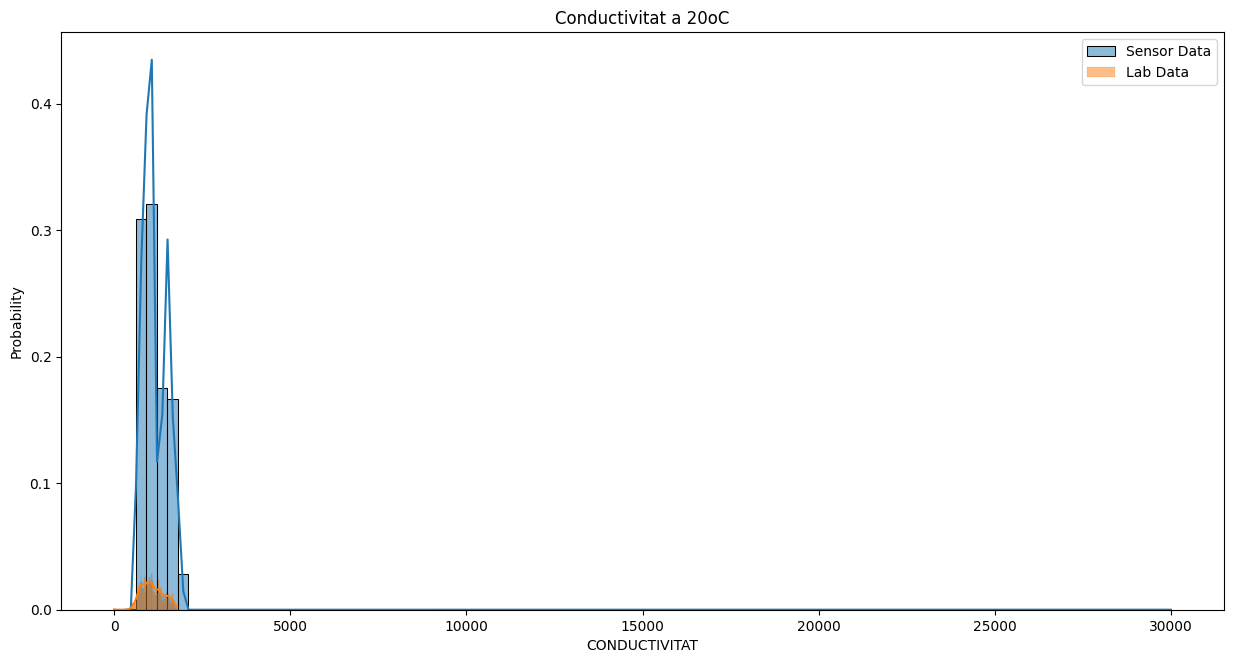

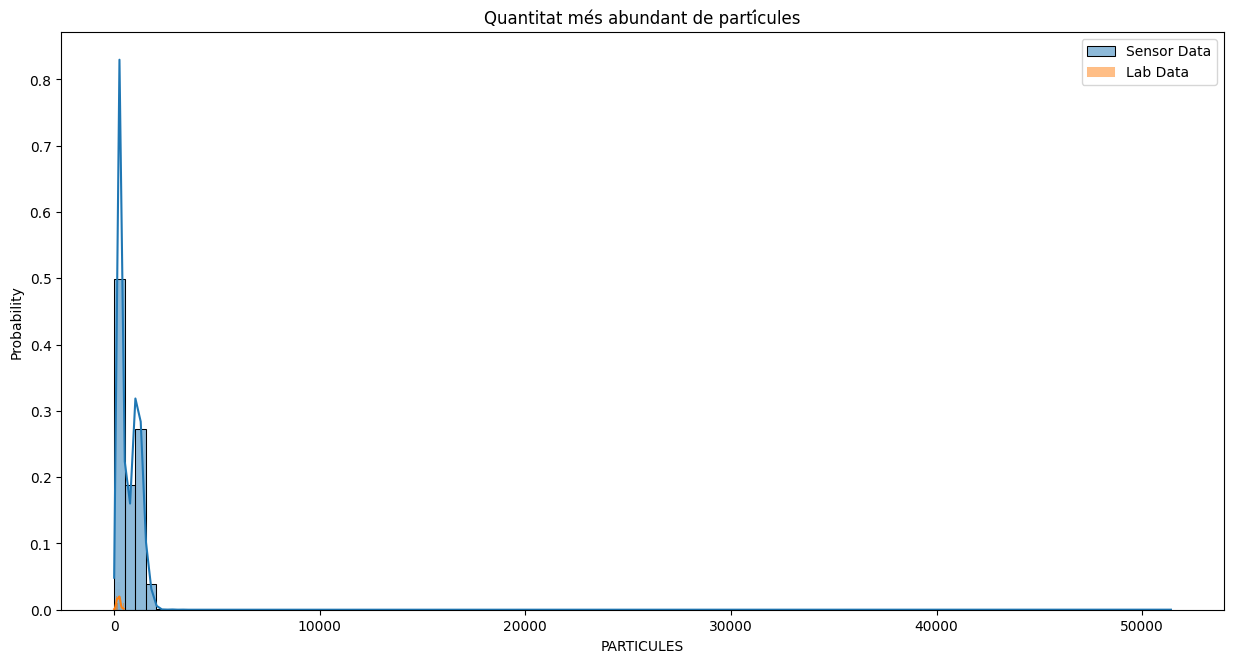

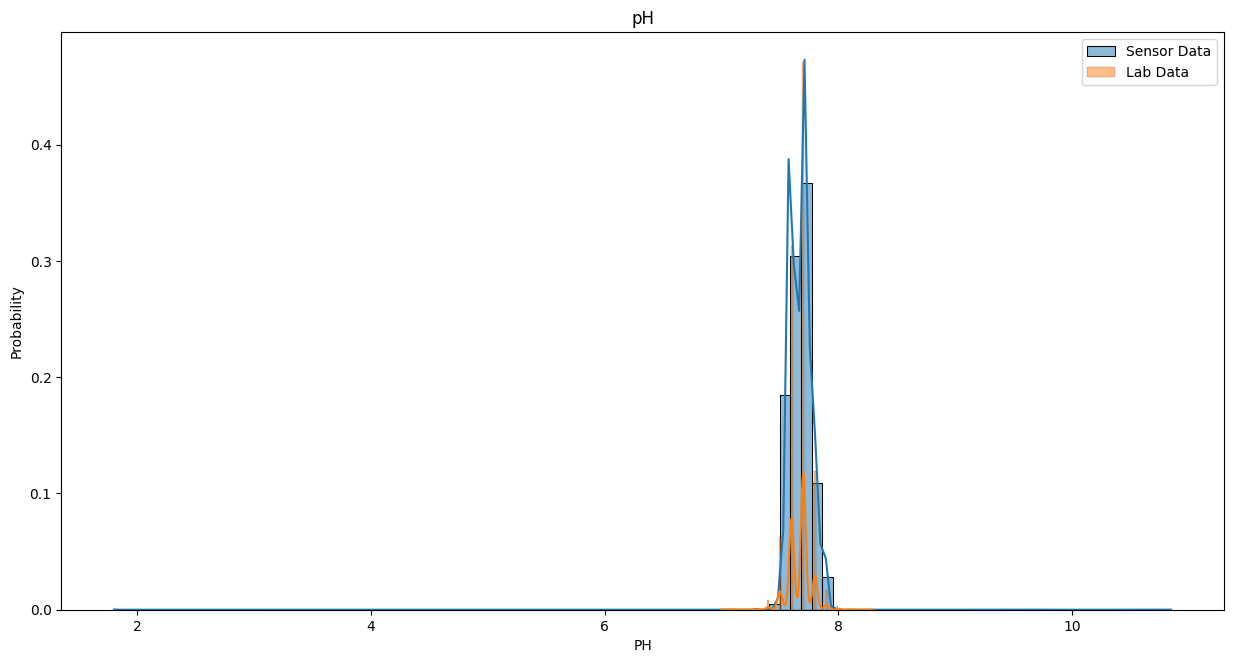

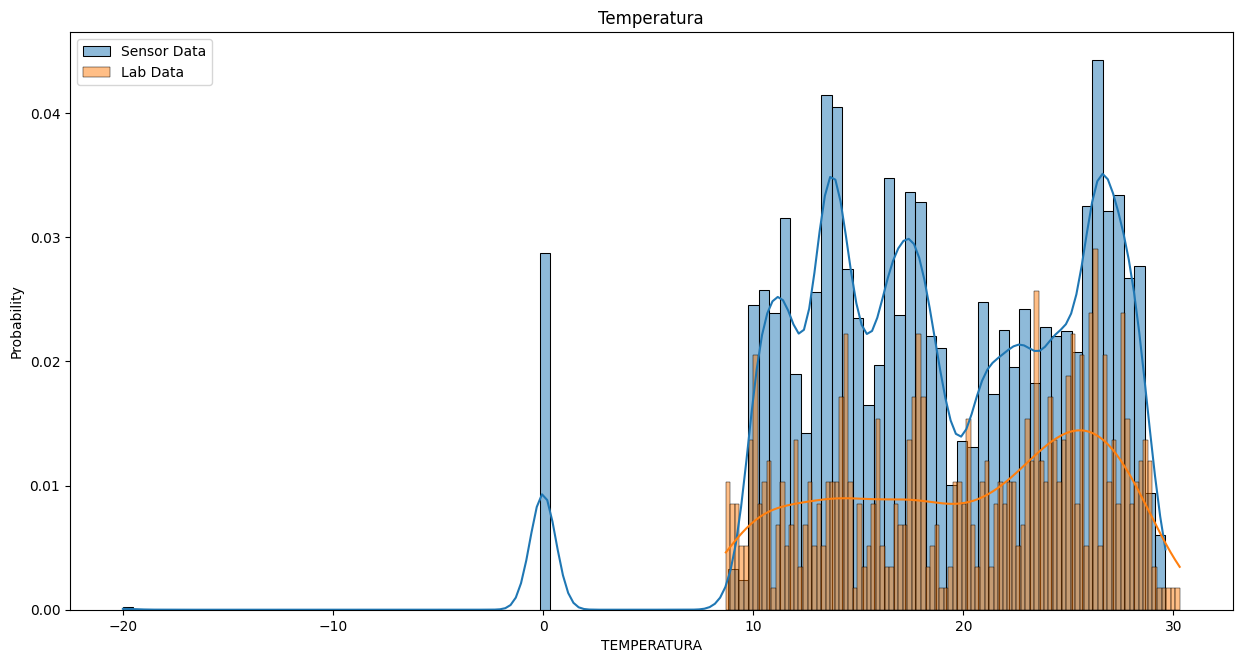

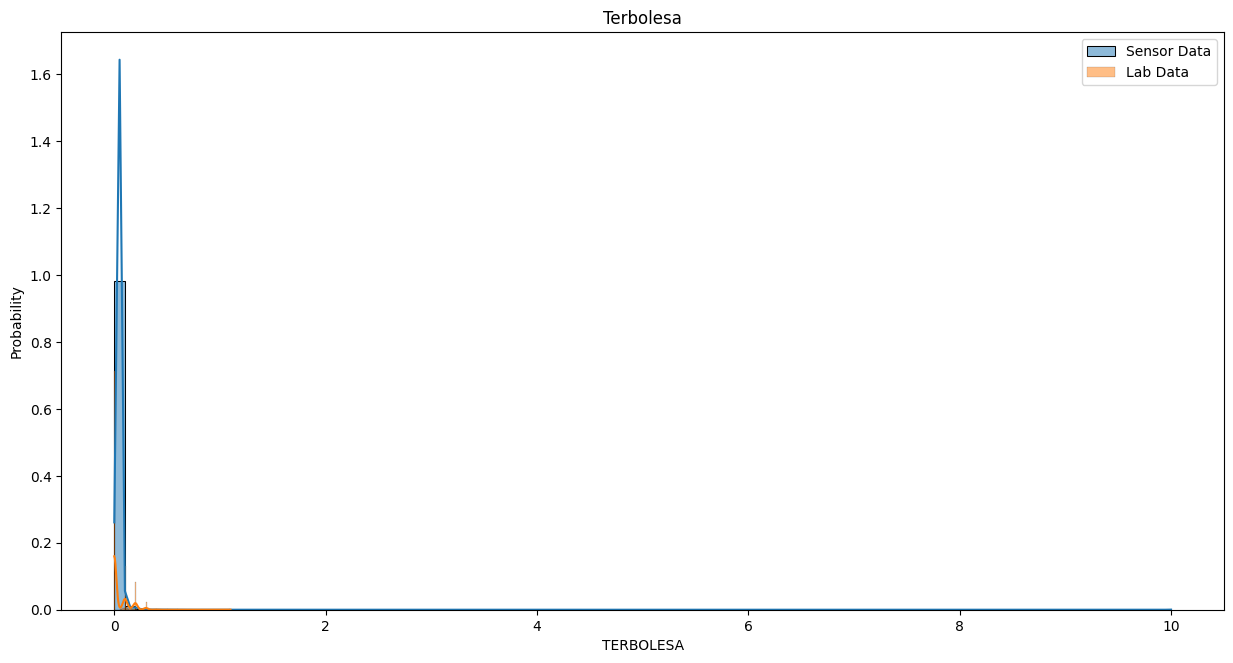

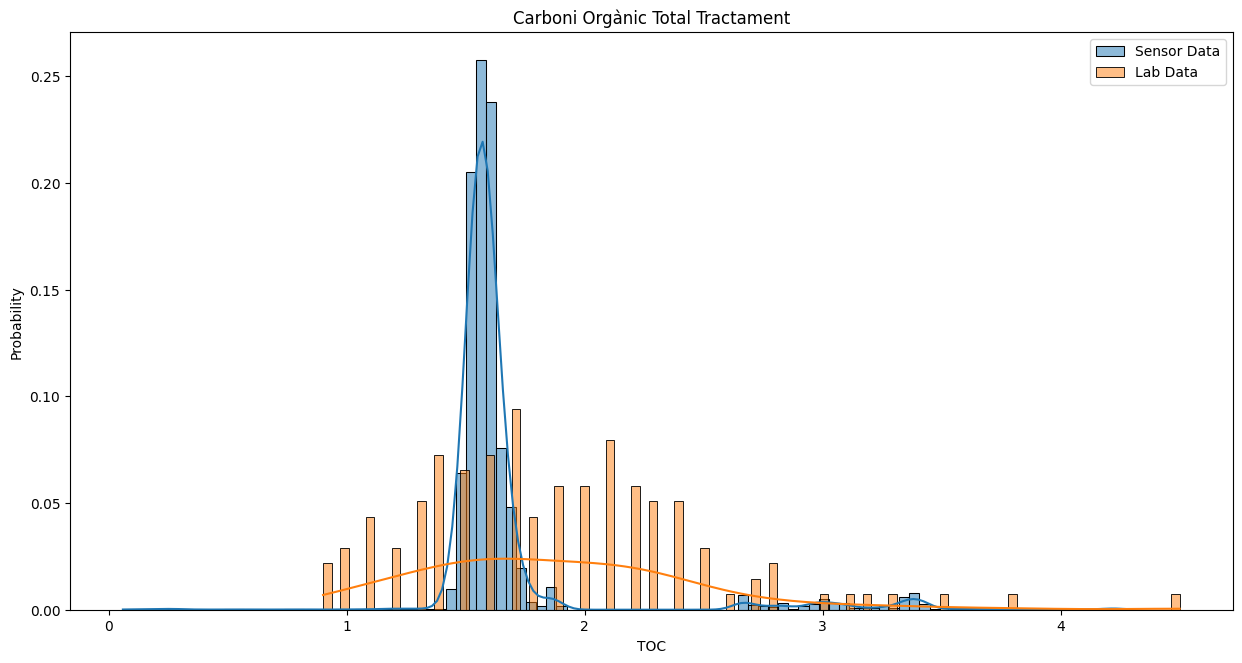

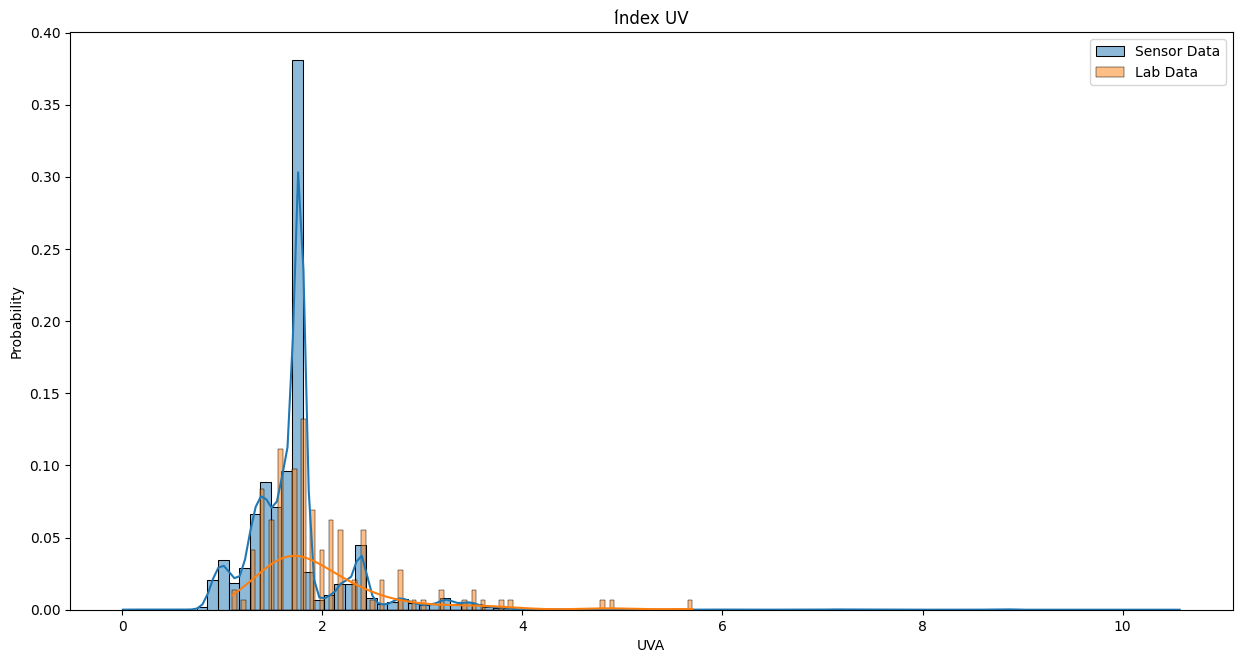

In [27]:
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[lab_key]
    sensor_df = eb1_sensor_df[sensor_key]

    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    if not lab_df.empty and not sensor_df.empty:
        plt.figure(figsize=(15, 7.5))

        # counts, bins, patches = plt.hist(
        #     lab_df,
        #     bins=100,
        #     color="blue",
        #     alpha=0.5,
        #     label="Lab",
        #     density=True,
        # )
        # # # Add counts as annotations
        # # for count, bin in zip(counts, bins):
        # #     plt.text(bin, count, str(int(count)))

        # plt.hist(
        #     sensor_df,
        #     bins=100,
        #     color="red",
        #     alpha=0.5,
        #     label="Sensor",
        #     density=True,
        # )

        sns.histplot(
            data=sensor_df,
            kde=True,
            bins=100,
            alpha=0.5,
            stat="probability",
            label="Sensor Data",
        )

        sns.histplot(
            data=lab_df,
            kde=True,
            bins=100,
            stat="probability",
            label="Lab Data",
        )

        plt.title(lab_key)
        plt.legend()
        plt.show()

        # The y-axis of a histplot with stat="probability" corresponds
        # to the probability that a value belongs to a certain bar.
        # The sum of the bar heights must be 1.

#### Boxplots

In [28]:
eb1_features_mapping

{'Clor lliure residual': 'CLOR LLIURE',
 'Color': 'COLOR',
 'Conductivitat a 20oC': 'CONDUCTIVITAT',
 'Quantitat més abundant de partícules': 'PARTICULES',
 'pH': 'PH',
 'Temperatura': 'TEMPERATURA',
 'Terbolesa': 'TERBOLESA',
 'Carboni Orgànic Total Tractament': 'TOC',
 'Índex UV': 'UVA'}

In [29]:
eb1_features_mapping.pop("Quantitat més abundant de partícules")
eb1_features_mapping.pop("Índex UV")
eb1_features_mapping.pop("Clor lliure residual")
eb1_features_mapping.pop("Carboni Orgànic Total Tractament")

'TOC'

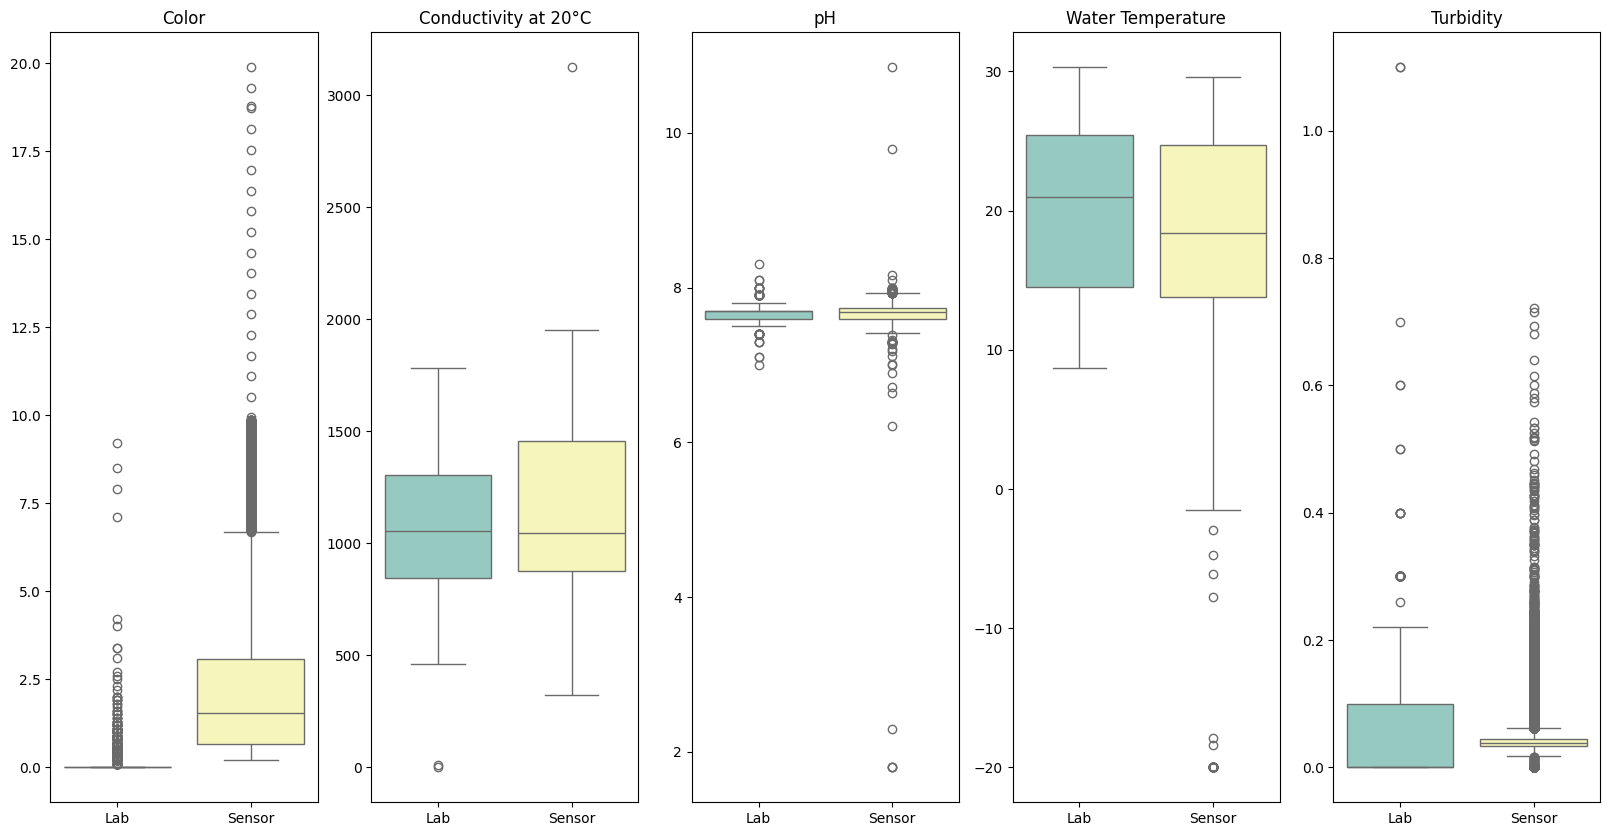

In [30]:
fix, axs = plt.subplots(1, len(eb1_features_mapping), figsize=(20, 10))

for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[lab_key]
    sensor_df = eb1_sensor_df[sensor_key]

    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    title = lab_key

    if lab_key == "Conductivitat a 20oC":
        title = "Conductivity at 20°C"

        sensor_df = sensor_df[sensor_df < 15000]

    elif lab_key == "Temperatura":
        title = "Water Temperature"

    elif lab_key == "Terbolesa":
        title = "Turbidity"
        sensor_df = sensor_df[sensor_df < 0.75]

    elif lab_key == "Color":
        sensor_df = sensor_df[sensor_df < 20]

    if not lab_df.empty and not sensor_df.empty:
        lab_df.name = "Lab"
        sensor_df.name = "Sensor"

        sns.boxplot(
            data=[lab_df, sensor_df],
            palette="Set3",
            ax=axs[list(eb1_features_mapping.keys()).index(lab_key)],
        )

        axs[list(eb0_features_mapping.keys()).index(lab_key)].set_title(title)

plt.show()

#### Time series

Lab Color Date Range: 2017-05-15 07:40:00 - 2023-01-30 08:25:00
Sensor COLOR Date Range: 2020-03-03 01:10:00 - 2023-01-30 08:20:00

Lab Color Count: 1951
Sensor COLOR Count: 145911

Lab Color % Missing: 5.98%
Sensor COLOR % Missing: 4.71%



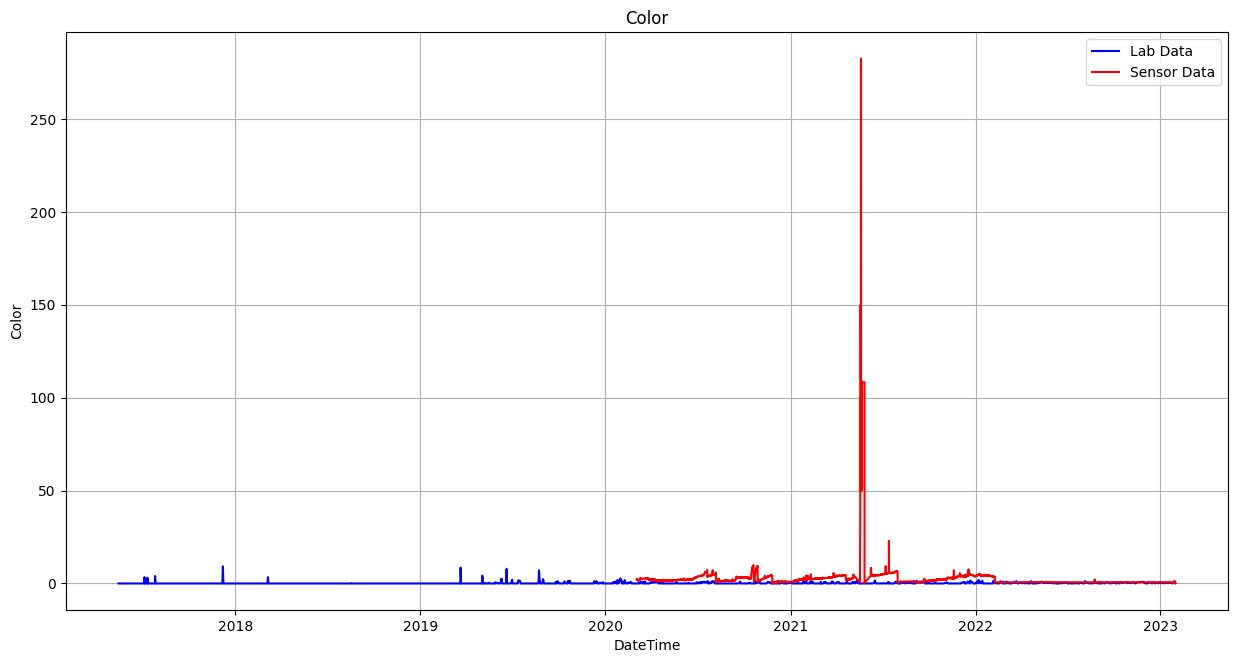

Lab Conductivitat a 20oC Date Range: 2017-05-15 07:40:00 - 2023-01-30 08:25:00
Sensor CONDUCTIVITAT Date Range: 2020-03-03 01:10:00 - 2023-01-30 08:20:00

Lab Conductivitat a 20oC Count: 1957
Sensor CONDUCTIVITAT Count: 150416

Lab Conductivitat a 20oC % Missing: 5.69%
Sensor CONDUCTIVITAT % Missing: 1.76%



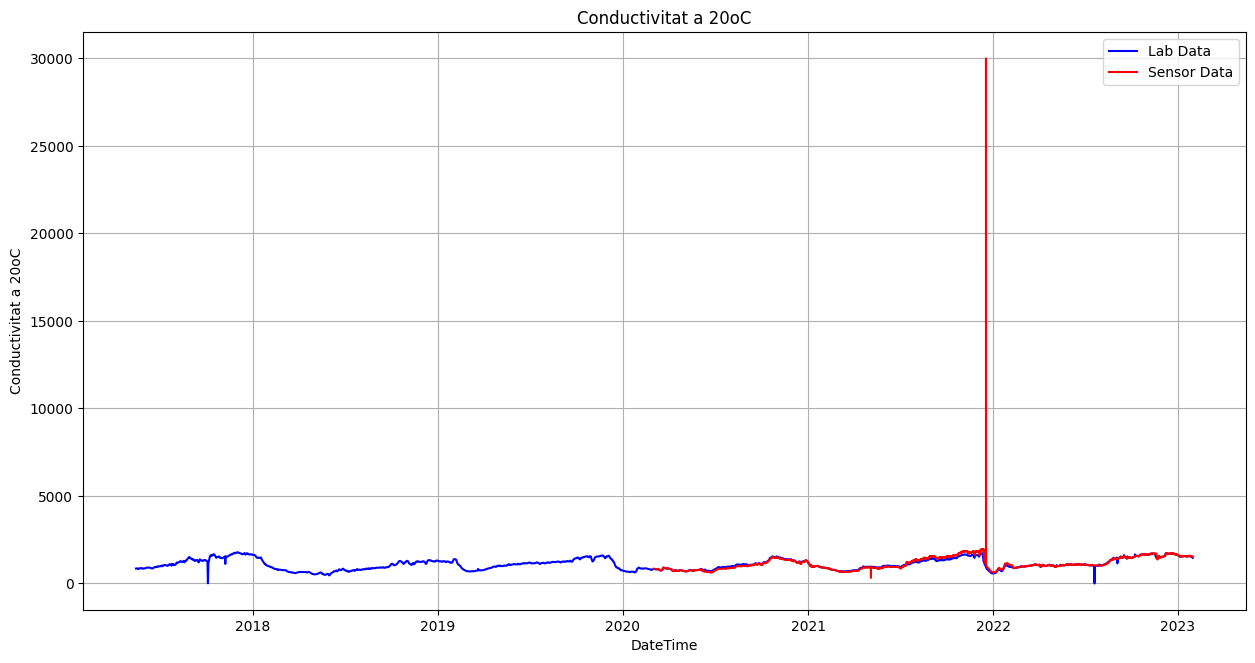

Lab pH Date Range: 2017-05-15 07:40:00 - 2023-01-30 08:25:00
Sensor PH Date Range: 2020-03-03 01:10:00 - 2023-01-30 08:20:00

Lab pH Count: 1957
Sensor PH Count: 45574

Lab pH % Missing: 5.69%
Sensor PH % Missing: 70.24%



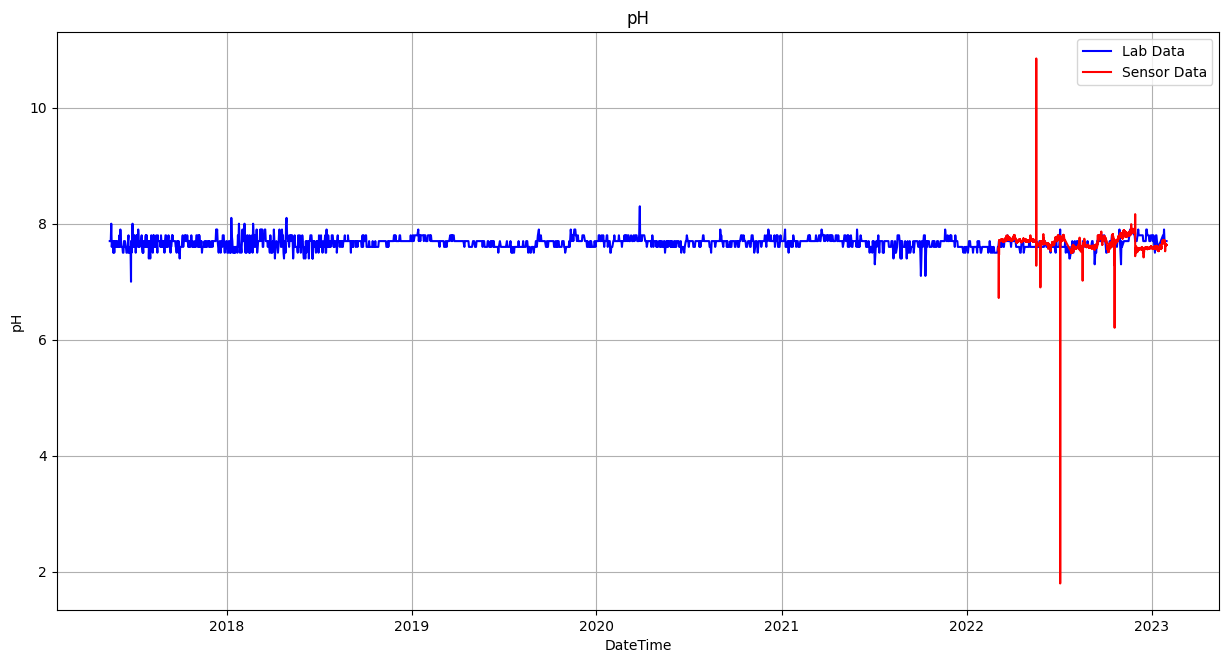

Lab Temperatura Date Range: 2017-05-15 07:40:00 - 2023-01-30 08:25:00
Sensor TEMPERATURA Date Range: 2020-03-03 01:10:00 - 2023-01-30 08:20:00

Lab Temperatura Count: 585
Sensor TEMPERATURA Count: 150419

Lab Temperatura % Missing: 71.81%
Sensor TEMPERATURA % Missing: 1.76%



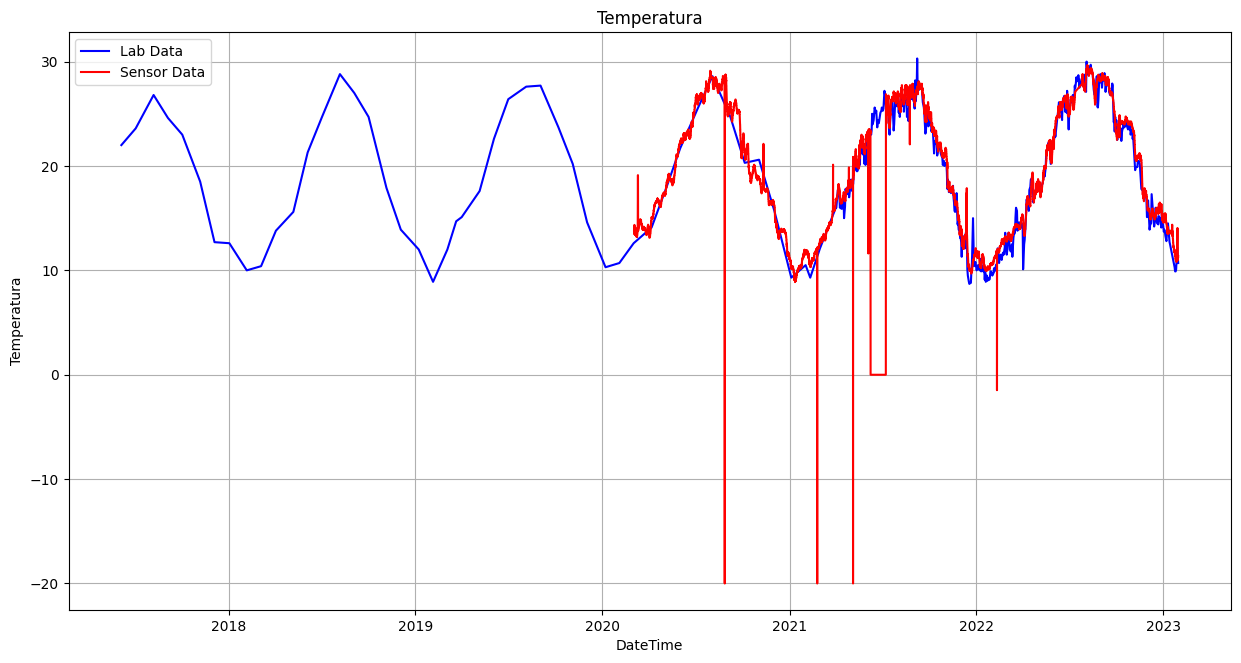

Lab Terbolesa Date Range: 2017-05-15 07:40:00 - 2023-01-30 08:25:00
Sensor TERBOLESA Date Range: 2020-03-03 01:10:00 - 2023-01-30 08:20:00

Lab Terbolesa Count: 1964
Sensor TERBOLESA Count: 94935

Lab Terbolesa % Missing: 5.35%
Sensor TERBOLESA % Missing: 38.00%



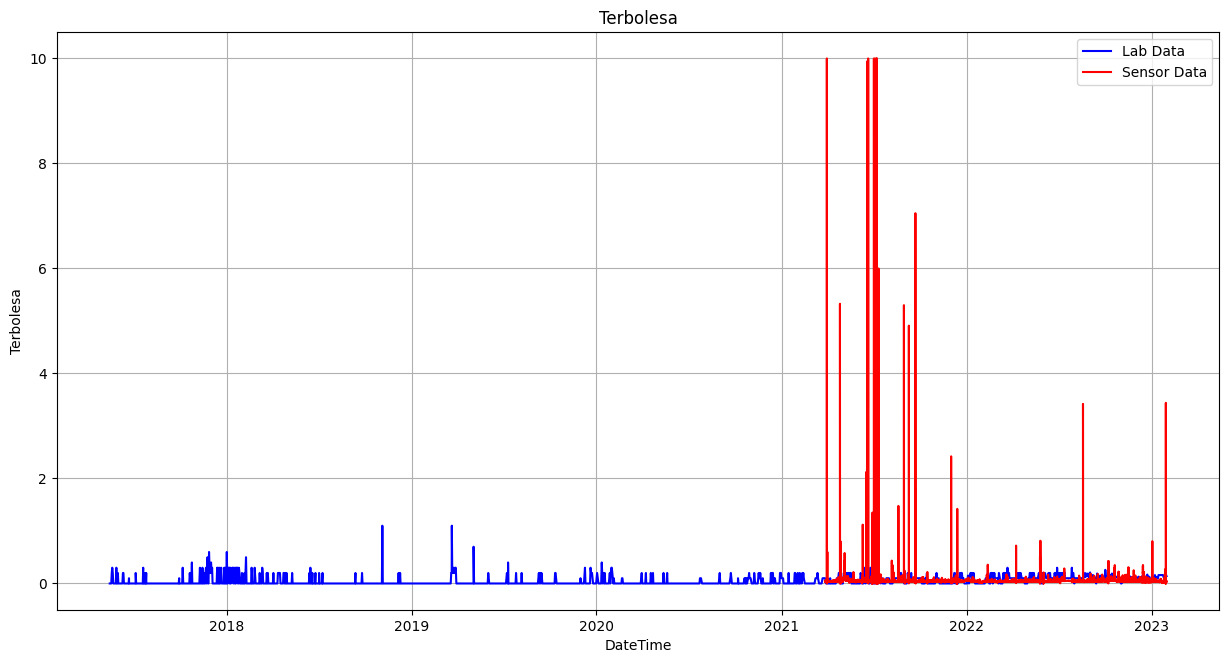

In [31]:
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[["DateTime", lab_key]]
    sensor_df = eb1_sensor_df[["DateTime", sensor_key]]

    # remove 0 values from sensor data
    sensor_df = sensor_df[sensor_df != 0]

    # print date range for both lab and sensor data
    print(
        f"Lab {lab_key} Date Range: {lab_df['DateTime'].min()} - {lab_df['DateTime'].max()}"
    )
    print(
        f"Sensor {sensor_key} Date Range: {sensor_df['DateTime'].min()} - {sensor_df['DateTime'].max()}"
    )
    print()
    # print count of values for both lab and sensor data
    print(f"Lab {lab_key} Count: {lab_df[lab_key].count()}")
    print(f"Sensor {sensor_key} Count: {sensor_df[sensor_key].count()}")
    print()

    # print % missing values for both lab and sensor data
    print(
        f"Lab {lab_key} % Missing: {lab_df[lab_key].isna().sum() / lab_df[lab_key].shape[0] * 100:.2f}%"
    )
    print(
        f"Sensor {sensor_key} % Missing: {sensor_df[sensor_key].isna().sum() / sensor_df[sensor_key].shape[0] * 100:.2f}%"
    )
    print()

    if not lab_df.empty and not sensor_df.empty:
        plt.figure(figsize=(15, 7.5))

        sns.lineplot(
            x="DateTime",
            y=lab_key,
            data=lab_df,
            color="blue",
            label="Lab Data",
        )

        sns.lineplot(
            x="DateTime",
            y=sensor_key,
            data=sensor_df,
            color="red",
            label="Sensor Data",
        )

        plt.title(lab_key)
        plt.legend()
        plt.grid(True)
        plt.show()

#### Retrieve Common Time Range data + Hypothesis Tests

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_7320/891953909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_df[sensor_key] = sensor_df[sensor_key][sensor_df[sensor_key] < 20]


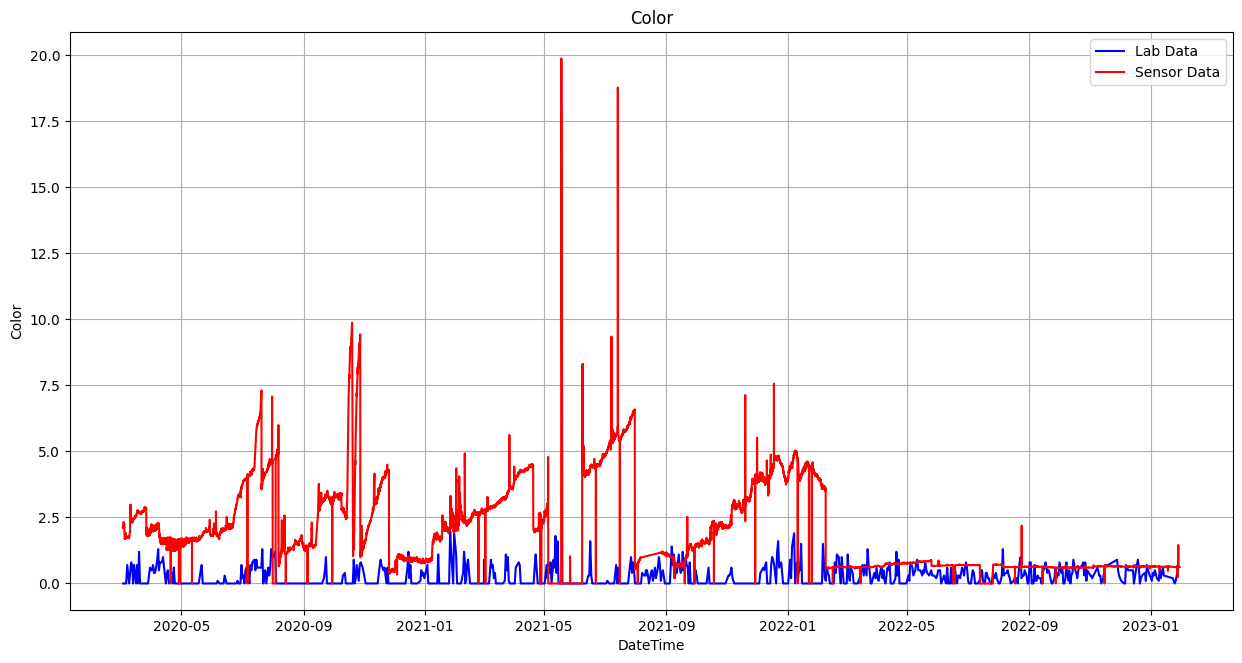

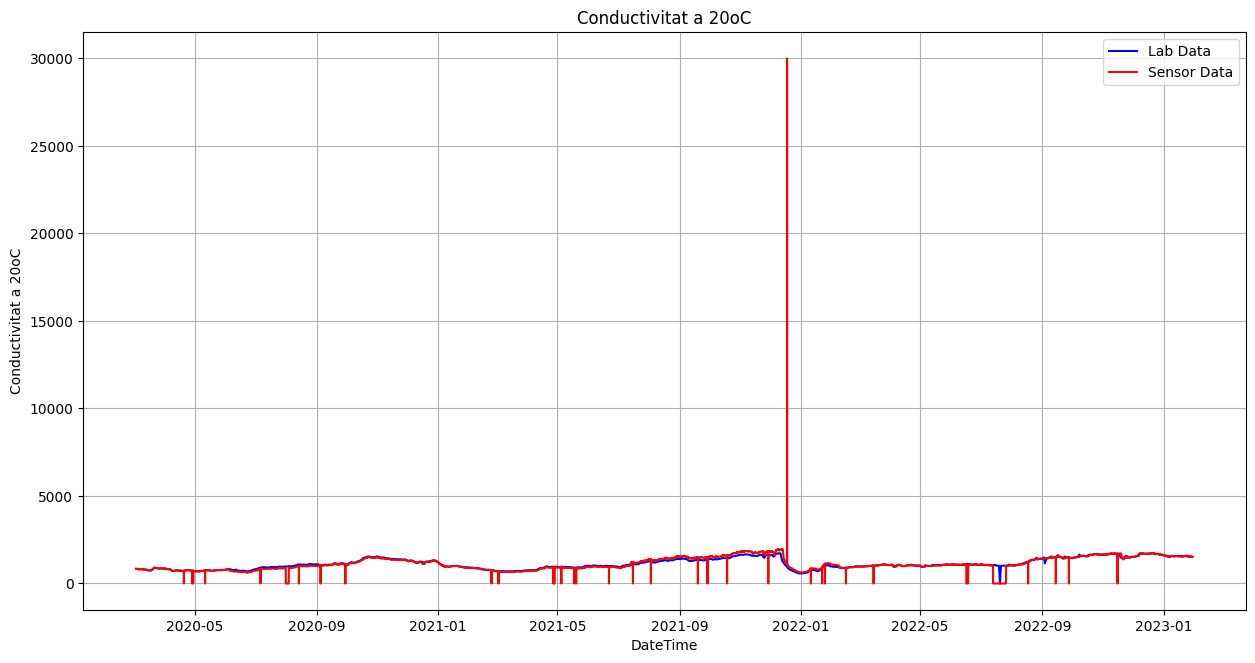

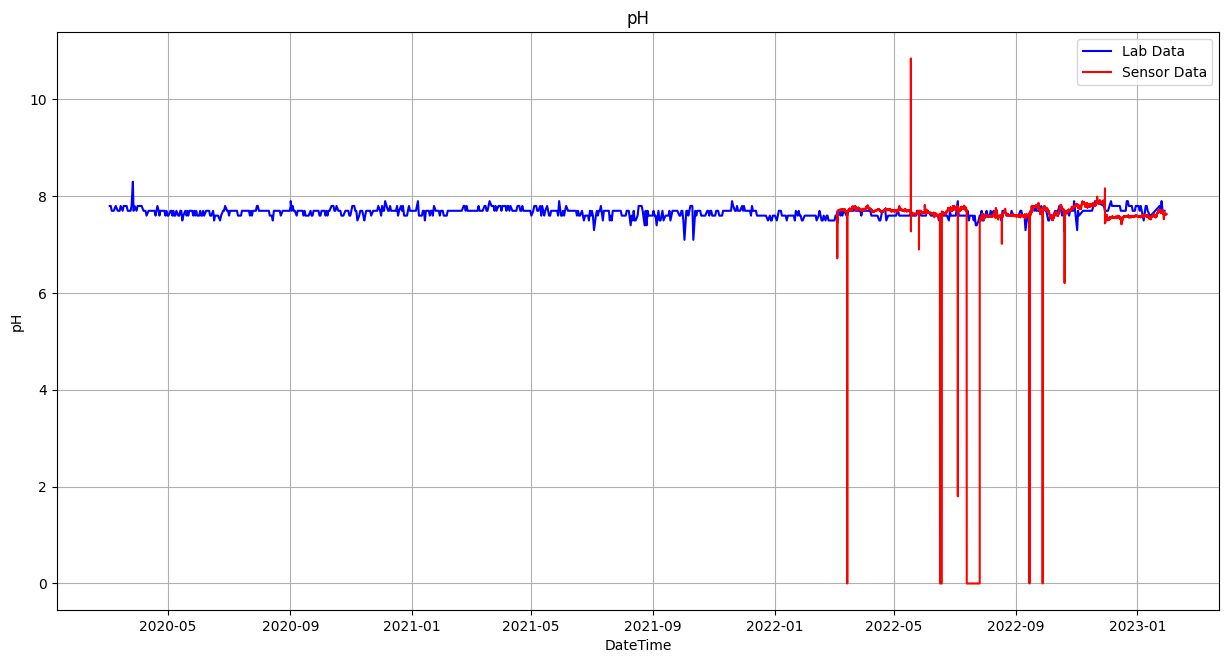

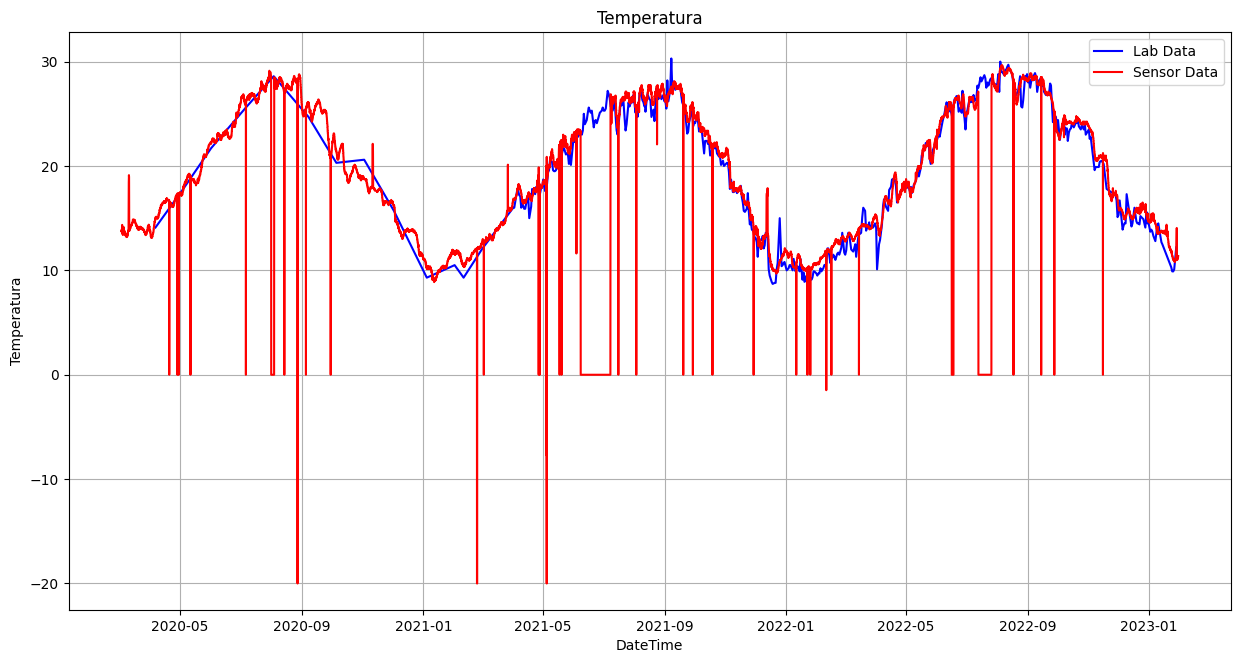

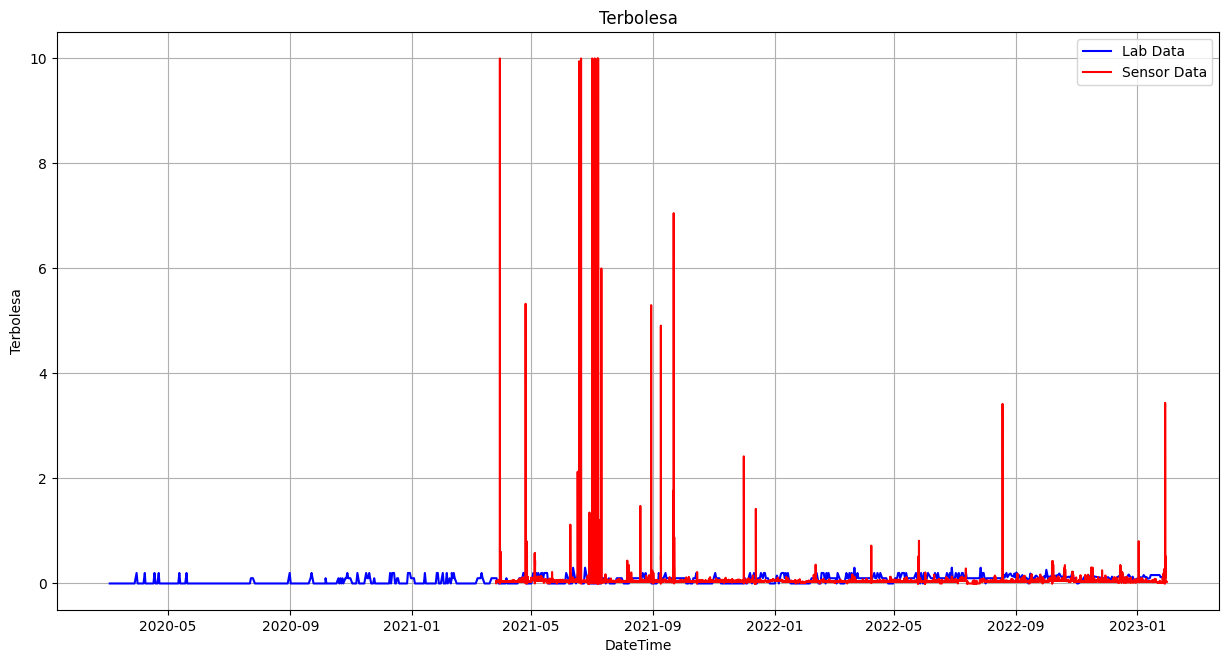

In [36]:
ks_hypothesis_tests = {}
t_hypothesis_tests = {}
u_hypothesis_tests = {}

# get common time range samples for lab and sensor data
for lab_key, sensor_key in eb1_features_mapping.items():
    lab_key = normalize_string(lab_key)
    lab_df = eb1_features_lab_df[["DateTime", lab_key]]
    sensor_df = eb1_sensor_df[["DateTime", sensor_key]]

    # remove 0 values from sensor data
    if lab_key == "Color":
        sensor_df[sensor_key] = sensor_df[sensor_key][
            sensor_df[sensor_key] < 20
        ]

    if not lab_df.empty and not sensor_df.empty:
        lab_time_range_df = lab_df[
            (lab_df["DateTime"] >= sensor_df["DateTime"].min())
            & (lab_df["DateTime"] <= sensor_df["DateTime"].max())
        ]

        sensor_time_range_df = sensor_df[
            (sensor_df["DateTime"] >= lab_df["DateTime"].min())
            & (sensor_df["DateTime"] <= lab_df["DateTime"].max())
        ]

        plt.figure(figsize=(15, 7.5))

        sns.lineplot(
            x="DateTime",
            y=lab_key,
            data=lab_time_range_df,
            color="blue",
            label="Lab Data",
        )

        sns.lineplot(
            x="DateTime",
            y=sensor_key,
            data=sensor_time_range_df,
            color="red",
            label="Sensor Data",
        )

        # # two sample KS test
        # ks_result, ks_p_value = stats.ks_2samp(
        #     lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna()
        # )
        # t_result, t_p_value = stats.ttest_ind(
        #     lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna()
        # )
        # u_result, u_p_value = stats.mannwhitneyu(
        #     lab_df[lab_key].dropna(), sensor_df[sensor_key].dropna()
        # )

        # ks_hypothesis_tests[lab_key] = {
        #     "ks_test": ks_result,
        #     "p_value": ks_p_value,
        # }

        # t_hypothesis_tests[lab_key] = {"t_test": t_result, "p_value": t_p_value}

        # u_hypothesis_tests[lab_key] = {"u_test": u_result, "p_value": u_p_value}

        # # print date range for both lab and sensor data
        # print(f"Lab {lab_key} Date Range: {lab_time_range_df['DateTime'].min()} - {lab_time_range_df['DateTime'].max()}")
        # print(f"Sensor {sensor_key} Date Range: {sensor_time_range_df['DateTime'].min()} - {sensor_time_range_df['DateTime'].max()}")
        # print()
        # # print count of values for both lab and sensor data
        # print(f"Lab {lab_key} Count: {lab_time_range_df[lab_key].count()}")
        # print(f"Sensor {sensor_key} Count: {sensor_time_range_df[sensor_key].count()}")
        # print()

        # # print % missing values for both lab and sensor data
        # print(f"Lab {lab_key} % Missing: {lab_time_range_df[lab_key].isna().sum() / lab_time_range_df[lab_key].shape[0] * 100:.2f}%")
        # print(f"Sensor {sensor_key} % Missing: {sensor_time_range_df[sensor_key].isna().sum() / sensor_time_range_df[sensor_key].shape[0] * 100:.2f}%")
        # print()

        plt.title(lab_key)
        plt.grid(True)
        plt.legend()
        plt.show()

In [46]:
pd.DataFrame(ks_hypothesis_tests).T

,ks_test,p_value
Color,0.883565,0.000000e+00
Conductivitat a 20oC,0.108016,4.379718e-20
pH,0.277430,3.799260e-128
Temperatura,0.110611,1.144891e-06
Terbolesa,0.711813,0.000000e+00


In [47]:
pd.DataFrame(t_hypothesis_tests).T

,t_test,p_value
Color,-21.772311,6.214335e-105
Conductivitat a 20oC,-6.921911,4.473409e-12
pH,-2.860457,4.232159e-03
Temperatura,4.497263,6.888495e-06
Terbolesa,-0.059919,9.522199e-01


In [48]:
pd.DataFrame(u_hypothesis_tests).T

,u_test,p_value
Color,10381052.5,0.000000e+00
Conductivitat a 20oC,136275331.0,1.685212e-08
pH,43138273.0,1.430649e-02
Temperatura,47959804.5,1.662321e-04
Terbolesa,53030511.5,2.291465e-235


#### Distributions Divergence

In [49]:
kl_divs = {}
js_divs = {}
tv_dists = {}
w_dists = {}

for lab_key, sensor_key in eb1_features_mapping.items():
    # Compute the probability distribution of the feature in each DataFrame
    lab_df = eb1_features_lab_df[lab_key]
    sensor_df = eb1_sensor_df[sensor_key]

    lab_pdist = np.histogram(lab_df.dropna(), bins=100, density=True)[0]
    sensor_pdist = np.histogram(sensor_df.dropna(), bins=100, density=True)[0]

    # Add a small constant to avoid division by zero
    lab_pdist = lab_pdist + np.finfo(np.float64).eps
    sensor_pdist = sensor_pdist + np.finfo(np.float64).eps

    # Compute divergence metrics
    kl_div = stats.entropy(lab_pdist, sensor_pdist)
    js_div = jensenshannon(lab_pdist, sensor_pdist)
    tv_dist = np.sum(np.abs(lab_pdist - sensor_pdist)) / 2
    w_dist = wasserstein_distance(lab_pdist, sensor_pdist)

    kl_divs[lab_key] = kl_div
    js_divs[lab_key] = js_div
    tv_dists[lab_key] = tv_dist
    w_dists[lab_key] = w_dist


kl_divs = pd.Series(kl_divs)
js_divs = pd.Series(js_divs)
tv_dists = pd.Series(tv_dists)
w_dists = pd.Series(w_dists)

In [50]:
kl_divs

Color                    1.158751
Conductivitat a 20oC    25.805532
pH                      32.934027
Temperatura             13.718143
Terbolesa                4.484466
dtype: float64

In [51]:
js_divs

Color                   0.345928
Conductivitat a 20oC    0.831319
pH                      0.813222
Temperatura             0.503759
Terbolesa               0.337767
dtype: float64

In [52]:
tv_dists

Color                    5.258271
Conductivitat a 20oC     0.029621
pH                      41.694699
Temperatura              1.713340
Terbolesa               40.607466
dtype: float64

In [53]:
w_dists

Color                   0.105158
Conductivitat a 20oC    0.000527
pH                      0.677072
Temperatura             0.026144
Terbolesa               0.809149
dtype: float64

### Targets

In [54]:
# show info about the targets

for column in eb1_targets_lab_df.columns.difference(["DateTime"]):
    print(f"Column: {column}")
    print()

    # common time range with eb1 features
    common_time_range_df = eb1_targets_lab_df[
        (
            eb1_targets_lab_df["DateTime"]
            >= eb1_features_lab_df["DateTime"].min()
        )
        & (
            eb1_targets_lab_df["DateTime"]
            <= eb1_features_lab_df["DateTime"].max()
        )
    ]

    print(
        f"Date Range: {common_time_range_df['DateTime'].min()} - {common_time_range_df['DateTime'].max()}"
    )

    print(f"Count: {common_time_range_df[column].count()}")
    print(
        f"% Missing: {common_time_range_df[column].isna().sum() / common_time_range_df[column].shape[0] * 100:.2f}%"
    )
    print()

Column: Bromodiclorometà

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 296
% Missing: 2.31%

Column: Bromoform

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 296
% Missing: 2.31%

Column: Clorat

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 133
% Missing: 56.11%

Column: Clorit

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 138
% Missing: 54.46%

Column: Cloroform

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 296
% Missing: 2.31%

Column: Dibromoclorometà

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 296
% Missing: 2.31%

Column: àcid bromocloroacètic

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 137
% Missing: 54.79%

Column: àcid dibromoacètic

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 137
% Missing: 54.79%

Column: àcid dicloroacètic

Date Range: 2017-05-15 07:40:00 - 2023-01-16 08:35:00
Count: 137
% Missing: 54.79%

Column: àcid monobromoacètic

Date Rang

# Lab Data Feature-Target Analysis

In [55]:
trihalometh_columns = [
    "Cloroform",
    "Bromodiclorometà",
    "Dibromoclorometà",
    "Bromoform",
]

acid_columns = [
    "àcid bromocloroacètic",
    "àcid dibromoacètic",
    "àcid dicloroacètic",
    "àcid monobromoacètic",
    "àcid monocloroacètic",
]

other_columns = [
    "Clorat",
    "Clorit",
]

trihalometh_mapping = {
    "Cloroform": "TCM",
    "Bromodiclorometà": "DCBM",
    "Dibromoclorometà": "CDBM",
    "Bromoform": "TBM",
}

## EB1 - THMs

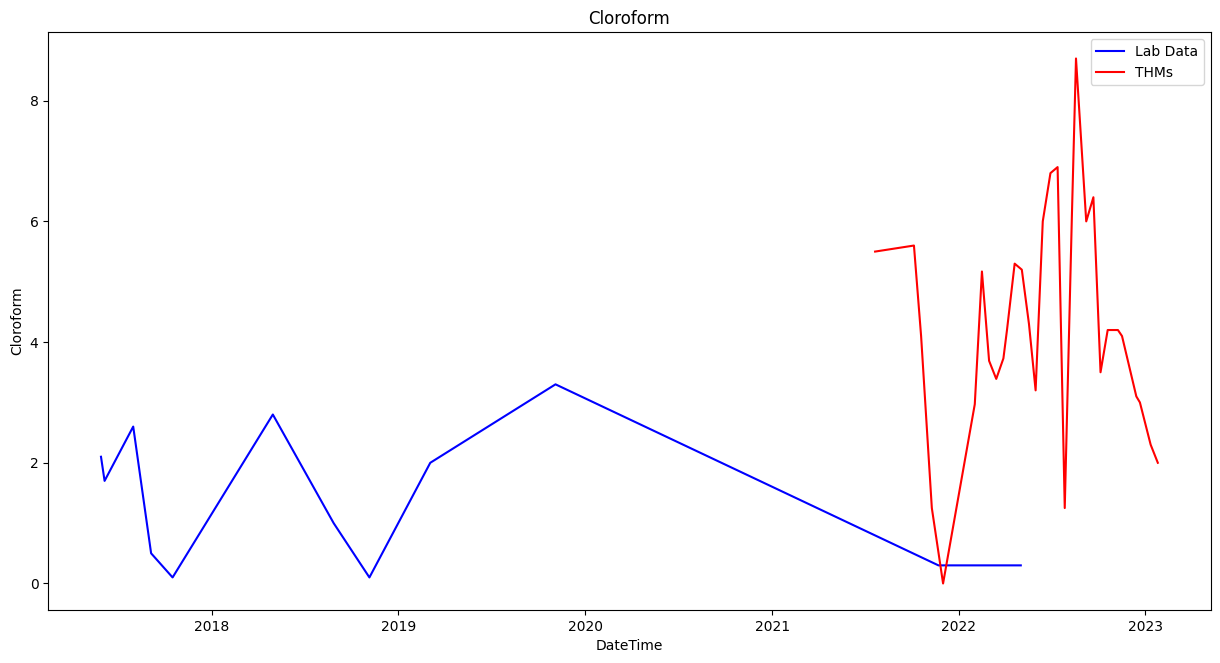

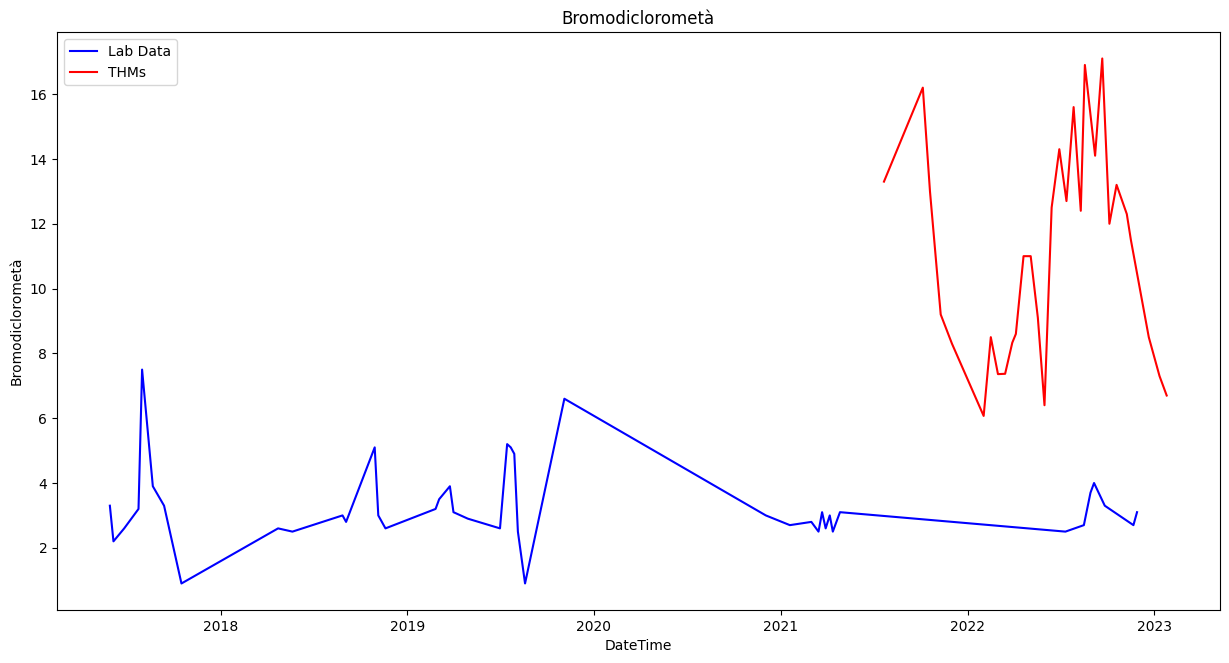

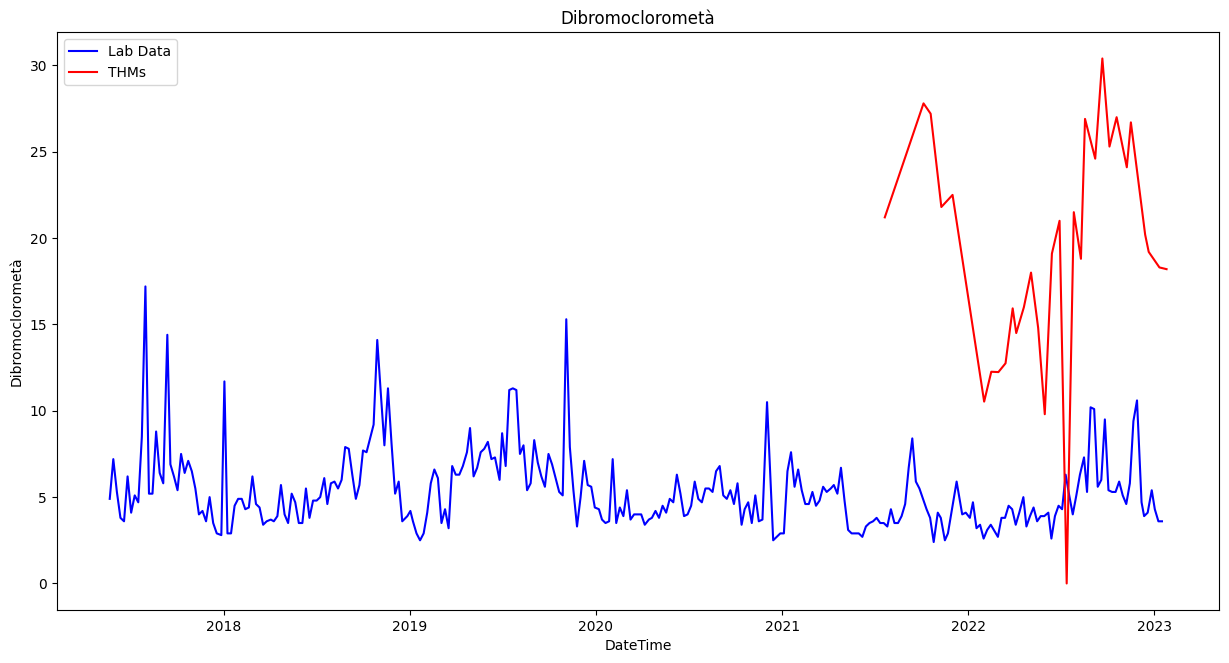

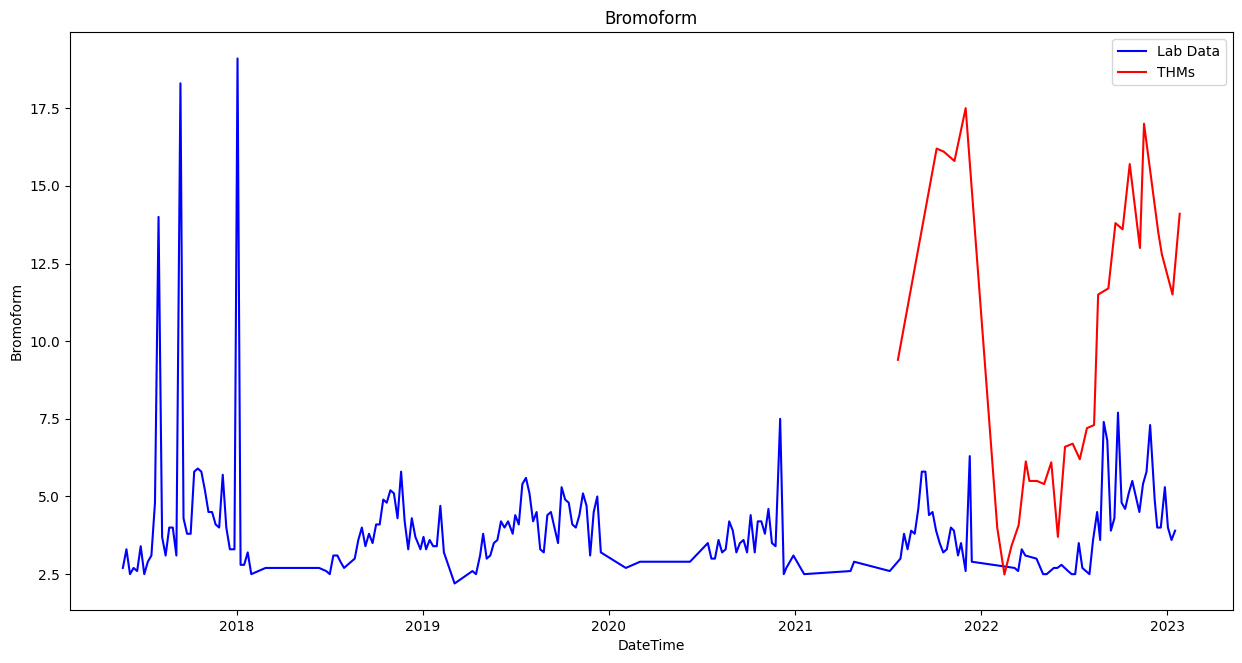

In [56]:
for eb1_key, thm_key in trihalometh_mapping.items():
    plt.figure(figsize=(15, 7.5))

    lab_df = eb1_targets_lab_df[["DateTime", eb1_key]]
    lab_df = lab_df[lab_df != 0]

    thms = thms_df[["DateTime", thm_key]]

    sns.lineplot(
        x="DateTime", y=eb1_key, data=lab_df, color="blue", label="Lab Data"
    )

    sns.lineplot(x="DateTime", y=thm_key, data=thms, color="red", label="THMs")

    plt.title(eb1_key)
    plt.show()

### Join on same day

In [57]:
eb1_targets_lab_df

,DateTime,Bromodiclorometà,Bromoform,Clorat,Clorit,Cloroform,Dibromoclorometà,àcid bromocloroacètic,àcid dibromoacètic,àcid dicloroacètic,àcid monobromoacètic,àcid monocloroacètic,àcid tricloroacètic
0,2017-05-15 07:40:00,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-22 07:15:00,0.0,2.7,0.0,0.0,0.0,4.9,1.3,1.7,0.8,0.0,0.0,0.5
2,2017-05-29 07:00:00,3.3,3.3,NaN,NaN,2.1,7.2,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-05 07:30:00,2.2,2.5,NaN,0.0,1.7,5.3,1.3,1.7,0.7,0.0,0.0,0.5
4,2017-06-12 07:40:00,0.0,2.7,NaN,NaN,0.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2022-12-19 06:45:00,0.0,4.0,127.0,0.0,0.0,4.1,0.8,2.2,0.0,0.0,0.0,0.0
299,2022-12-27 07:00:00,0.0,5.3,NaN,NaN,0.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN
300,2023-01-02 06:55:00,0.0,4.0,136.0,0.0,0.0,4.3,0.9,2.3,0.0,0.0,0.0,0.5
301,2023-01-09 08:30:00,0.0,3.6,NaN,NaN,0.0,3.6,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
eb1_features_lab_df

,DateTime,Carboni Orgànic Total Tractament,Clor lliure residual,Color,Conductivitat a 20oC,Quantitat més abundant de partícules,Temperatura,Terbolesa,pH,Índex UV
0,2017-05-15 07:40:00,NaN,1.20,0.0,852.0,NaN,NaN,0.00,7.7,NaN
1,2017-05-16 07:45:00,NaN,0.91,0.0,857.0,NaN,NaN,0.00,7.7,NaN
2,2017-05-17 07:30:00,NaN,1.25,0.0,866.0,NaN,NaN,0.00,7.7,NaN
3,2017-05-18 07:30:00,NaN,1.04,0.0,863.0,NaN,NaN,0.00,8.0,NaN
4,2017-05-19 07:30:00,NaN,1.36,0.0,830.0,NaN,NaN,0.20,7.6,NaN
...,...,...,...,...,...,...,...,...,...,...
2070,2023-01-24 08:25:00,NaN,0.88,0.1,1552.0,NaN,9.9,0.12,7.7,NaN
2071,2023-01-25 08:30:00,NaN,0.87,0.0,1539.0,NaN,9.9,0.12,7.9,NaN
2072,2023-01-26 08:30:00,NaN,0.83,0.1,1528.0,NaN,10.1,0.13,7.7,NaN
2073,2023-01-28 08:55:00,NaN,0.84,0.5,1524.0,NaN,12.2,0.19,7.7,NaN


In [59]:
eb1_features_lab_df["Date"] = eb1_features_lab_df["DateTime"].dt.date
thms_df["Date"] = thms_df["DateTime"].dt.date

In [61]:
eb1_features_lab_df["Date"]

0       2017-05-15
1       2017-05-16
2       2017-05-17
3       2017-05-18
4       2017-05-19
           ...    
2070    2023-01-24
2071    2023-01-25
2072    2023-01-26
2073    2023-01-28
2074    2023-01-30
Name: Date, Length: 2075, dtype: object

In [62]:
thms_df["Date"]

0     2021-07-21
1     2021-10-05
2     2021-10-19
3     2021-11-09
4     2021-12-01
5     2022-02-01
6     2022-02-15
7     2022-03-01
8     2022-03-15
9     2022-03-29
10    2022-04-05
11    2022-04-20
12    2022-05-04
13    2022-05-18
14    2022-05-31
15    2022-06-14
16    2022-06-29
17    2022-07-13
18    2022-07-27
19    2022-08-10
20    2022-08-18
21    2022-09-07
22    2022-09-21
23    2022-10-05
24    2022-10-19
25    2022-11-08
26    2022-11-16
27    2022-12-14
28    2022-12-21
29    2023-01-11
30    2023-01-25
Name: Date, dtype: object

In [60]:
pd.merge(eb1_features_lab_df, thms_df, on="Date", how="inner")

,DateTime_x,Carboni Orgànic Total Tractament,Clor lliure residual,Color,Conductivitat a 20oC,Quantitat més abundant de partícules,Temperatura,Terbolesa,pH,Índex UV,Date,Unnamed: 0,DateTime_y,TCM,DCBM,CDBM,TBM,TTHMs
0,2021-07-21 06:40:00,NaN,0.93,0.0,1112.0,NaN,26.1,0.00,7.5,NaN,2021-07-21,0,2021-07-21 09:00:00,5.50,13.30,21.20,9.40,49.40
1,2021-10-05 07:00:00,NaN,1.28,0.0,1363.0,NaN,23.3,0.00,7.7,NaN,2021-10-05,1,2021-10-05 09:15:00,5.60,16.20,27.80,16.20,65.80
2,2021-10-19 07:10:00,NaN,1.15,0.0,1448.0,NaN,21.7,0.00,7.6,NaN,2021-10-19,2,2021-10-19 09:05:00,4.10,13.00,27.20,16.10,60.40
3,2021-11-09 07:30:00,NaN,1.27,0.0,1641.0,NaN,17.5,0.00,7.6,NaN,2021-11-09,3,2021-11-09 08:52:00,1.25,9.20,21.80,15.80,46.80
4,2021-12-01 06:40:00,2.6,1.31,0.0,1608.0,NaN,13.1,0.00,7.8,2.0,2021-12-01,4,2021-12-01 08:40:00,0.00,8.30,22.50,17.50,48.30
5,2022-02-01 06:40:00,NaN,1.18,0.0,975.0,NaN,9.5,0.00,7.6,NaN,2022-02-01,5,2022-02-01 09:00:00,2.97,6.07,10.53,3.99,23.56
6,2022-02-15 06:48:18,NaN,0.97,0.0,912.0,NaN,11.1,0.00,7.7,NaN,2022-02-15,6,2022-02-15 08:40:00,5.17,8.50,12.26,2.49,28.41
7,2022-03-01 08:15:00,NaN,0.93,0.0,968.0,NaN,11.5,0.10,7.5,NaN,2022-03-01,7,2022-03-01 08:30:00,3.69,7.36,12.24,3.41,26.71
8,2022-03-15 08:30:00,NaN,0.88,0.4,1012.0,NaN,13.5,0.10,7.6,NaN,2022-03-15,8,2022-03-15 08:30:00,3.39,7.37,12.75,4.08,27.59
9,2022-03-29 08:00:00,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,2022-03-29,9,2022-03-29 08:45:00,3.73,8.33,15.93,6.13,34.12


In [63]:
thms_df["Date"] = thms_df["Date"] + pd.DateOffset(days=1)

In [64]:
pd.merge(eb1_features_lab_df, thms_df, on="Date", how="inner")

,DateTime_x,Carboni Orgànic Total Tractament,Clor lliure residual,Color,Conductivitat a 20oC,Quantitat més abundant de partícules,Temperatura,Terbolesa,pH,Índex UV,Date,Unnamed: 0,DateTime_y,TCM,DCBM,CDBM,TBM,TTHMs
0,2021-07-22 08:20:00,NaN,1.02,0.0,1125.0,NaN,24.6,0.00,7.7,NaN,2021-07-22,0,2021-07-21 09:00:00,5.50,13.30,21.20,9.40,49.40
1,2021-10-06 08:30:00,NaN,1.39,0.0,1388.0,NaN,23.6,0.00,7.6,NaN,2021-10-06,1,2021-10-05 09:15:00,5.60,16.20,27.80,16.20,65.80
2,2021-10-20 08:30:00,NaN,1.19,0.0,1446.0,NaN,21.7,0.00,7.6,NaN,2021-10-20,2,2021-10-19 09:05:00,4.10,13.00,27.20,16.10,60.40
3,2021-11-10 06:25:00,NaN,1.12,0.0,1647.0,NaN,17.7,0.00,7.7,NaN,2021-11-10,3,2021-11-09 08:52:00,1.25,9.20,21.80,15.80,46.80
4,2021-12-02 08:15:00,NaN,1.33,0.0,1623.0,NaN,12.7,0.10,7.7,NaN,2021-12-02,4,2021-12-01 08:40:00,0.00,8.30,22.50,17.50,48.30
5,2022-02-02 08:20:00,NaN,1.23,0.0,949.0,NaN,9.7,0.00,7.6,NaN,2022-02-02,5,2022-02-01 09:00:00,2.97,6.07,10.53,3.99,23.56
6,2022-02-16 08:23:25,NaN,0.95,0.0,888.0,NaN,11.2,0.00,7.6,NaN,2022-02-16,6,2022-02-15 08:40:00,5.17,8.50,12.26,2.49,28.41
7,2022-03-02 08:25:00,NaN,0.96,1.1,967.0,NaN,11.9,0.10,7.5,NaN,2022-03-02,7,2022-03-01 08:30:00,3.69,7.36,12.24,3.41,26.71
8,2022-03-16 08:25:00,NaN,0.94,0.5,1017.0,NaN,13.5,0.10,7.7,NaN,2022-03-16,8,2022-03-15 08:30:00,3.39,7.37,12.75,4.08,27.59
9,2022-03-30 08:25:00,NaN,0.98,0.2,1050.0,NaN,14.3,0.10,7.7,NaN,2022-03-30,9,2022-03-29 08:45:00,3.73,8.33,15.93,6.13,34.12


In [39]:
# join the datasets based on the date without considering the time

eb1_features_lab_df["Date"] = eb1_features_lab_df["DateTime"].dt.date
eb1_targets_lab_df["Date"] = eb1_targets_lab_df["DateTime"].dt.date


# change to DateTime if you want to consider also the time
eb1_lab_df = pd.merge(
    eb1_features_lab_df, eb1_targets_lab_df, on="Date", how="inner"
)

eb1_features_lab_df.drop(columns=["Date"], inplace=True)
eb1_targets_lab_df.drop(columns=["Date"], inplace=True)

In [40]:
eb1_lab_df

,DateTime_x,Carboni Orgànic Total Tractament,Clor lliure residual,Color,Conductivitat a 20oC,Quantitat més abundant de partícules,Temperatura,Terbolesa,pH,Índex UV,...,Clorat,Clorit,Cloroform,Dibromoclorometà,àcid bromocloroacètic,àcid dibromoacètic,àcid dicloroacètic,àcid monobromoacètic,àcid monocloroacètic,àcid tricloroacètic
0,2017-05-15 07:40:00,NaN,1.20,0.0,852.0,NaN,NaN,0.00,7.7,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-22 07:15:00,4.5,0.72,0.0,864.0,NaN,NaN,0.00,7.5,2.0,...,0.0,0.0,0.0,4.9,1.3,1.7,0.8,0.0,0.0,0.5
2,2017-05-29 07:00:00,NaN,0.55,0.0,860.0,NaN,NaN,0.00,7.7,NaN,...,NaN,NaN,2.1,7.2,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-05 07:30:00,3.8,1.32,0.0,902.0,NaN,22.0,0.00,7.9,2.4,...,NaN,0.0,1.7,5.3,1.3,1.7,0.7,0.0,0.0,0.5
4,2017-06-12 07:40:00,NaN,1.20,0.0,894.0,NaN,NaN,0.00,7.7,NaN,...,NaN,NaN,0.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2022-12-19 08:00:00,NaN,NaN,NaN,NaN,181.0,NaN,NaN,NaN,NaN,...,127.0,0.0,0.0,4.1,0.8,2.2,0.0,0.0,0.0,0.0
434,2022-12-27 07:00:00,NaN,1.06,0.1,1655.0,NaN,14.5,0.13,7.7,NaN,...,NaN,NaN,0.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN
435,2023-01-02 06:55:00,1.4,1.06,0.1,1580.0,NaN,13.7,0.10,7.8,1.8,...,136.0,0.0,0.0,4.3,0.9,2.3,0.0,0.0,0.0,0.5
436,2023-01-09 08:30:00,NaN,0.91,0.1,1583.0,NaN,14.3,0.11,7.8,NaN,...,NaN,NaN,0.0,3.6,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
eb1_lab_df.columns.to_list()

['DateTime_x',
 'Carboni Orgànic Total Tractament',
 'Clor lliure residual',
 'Color',
 'Conductivitat a 20oC',
 'Quantitat més abundant de partícules',
 'Temperatura',
 'Terbolesa',
 'pH',
 'Índex UV',
 'Date',
 'DateTime_y',
 'Bromodiclorometà',
 'Bromoform',
 'Clorat',
 'Clorit',
 'Cloroform',
 'Dibromoclorometà',
 'àcid bromocloroacètic',
 'àcid dibromoacètic',
 'àcid dicloroacètic',
 'àcid monobromoacètic',
 'àcid monocloroacètic',
 'àcid tricloroacètic']

In [49]:
eb1_lab_df.drop(columns=["Date", "DateTime_y"], inplace=True)
eb1_lab_df.rename(columns={"DateTime_x": "DateTime"}, inplace=True)

In [50]:
eb1_lab_df.isna().sum()

DateTime                                    0
Carboni Orgànic Total Tractament         295
Clor lliure residual                      107
Color                                     109
Conductivitat a 20oC                      108
Quantitat més abundant de partícules    355
Temperatura                               301
Terbolesa                                 107
pH                                        108
Índex UV                                 294
Bromodiclorometà                           16
Bromoform                                  16
Clorat                                    203
Clorit                                    195
Cloroform                                  16
Dibromoclorometà                           16
àcid bromocloroacètic                     192
àcid dibromoacètic                        192
àcid dicloroacètic                        192
àcid monobromoacètic                      192
àcid monocloroacètic                      192
àcid tricloroacètic               

In [46]:
# count number of rows that have no missing values
eb1_lab_df.dropna().shape[0]

# count number of rows that have at least one missing value
eb1_lab_df.shape[0] - eb1_lab_df.dropna().shape[0]

437

### Join on previous day EB(t-1) -> THMs(t)

In [41]:
eb1_features_lab_df["Date"] = eb1_features_lab_df["DateTime"].dt.date
eb1_targets_lab_df["Date"] = (
    eb1_targets_lab_df["DateTime"] - pd.Timedelta(days=1)
).dt.date

eb1_lab_df = pd.merge(
    eb1_features_lab_df, eb1_targets_lab_df, on="Date", how="inner"
)

eb1_features_lab_df.drop(columns=["Date"], inplace=True)
eb1_targets_lab_df.drop(columns=["Date"], inplace=True)

In [42]:
eb1_lab_df

,DateTime_x,Carboni Orgànic Total Tractament,Clor lliure residual,Color,Conductivitat a 20oC,Quantitat més abundant de partícules,Temperatura,Terbolesa,pH,Índex UV,...,Bromoform,Clorat,Clorit,Cloroform,Dibromoclorometà,àcid bromocloroacètic,àcid dibromoacètic,àcid dicloroacètic,àcid monobromoacètic,àcid monocloroacètic
0,2017-05-21 07:30:00,NaN,1.17,0.0,856.0,NaN,NaN,0.20,7.7,NaN,...,2.7,0.0,0.0,0.0,4.9,1.3,1.7,0.8,0.0,0.0
1,2017-05-28 09:00:00,NaN,0.81,0.0,847.0,NaN,NaN,0.30,7.6,NaN,...,3.3,NaN,NaN,2.1,7.2,NaN,NaN,NaN,NaN,NaN
2,2017-06-04 08:55:00,NaN,0.97,0.0,893.0,NaN,NaN,0.00,7.6,NaN,...,2.5,NaN,0.0,1.7,5.3,1.3,1.7,0.7,0.0,0.0
3,2017-06-11 08:03:00,NaN,0.95,0.0,901.0,NaN,NaN,0.20,7.5,NaN,...,2.7,NaN,NaN,0.0,3.8,NaN,NaN,NaN,NaN,NaN
4,2017-06-18 08:35:00,NaN,0.87,0.0,879.0,NaN,NaN,0.00,7.5,NaN,...,2.6,NaN,NaN,0.0,3.6,1.5,1.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2022-06-19 07:15:00,NaN,0.87,NaN,NaN,NaN,26.4,0.10,NaN,NaN,...,2.6,447.0,0.0,0.0,3.9,1.3,2.2,0.5,0.0,0.0
102,2022-06-26 11:05:00,NaN,0.90,0.5,1098.0,NaN,25.1,0.20,7.7,NaN,...,2.5,NaN,NaN,0.0,4.5,NaN,NaN,NaN,NaN,NaN
103,2022-09-13 08:32:00,NaN,1.03,0.0,1505.0,NaN,28.3,0.00,7.5,NaN,...,NaN,102.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2022-12-06 11:00:00,NaN,1.08,0.0,1625.0,NaN,14.3,0.13,7.8,NaN,...,4.9,78.0,0.0,0.0,4.7,0.9,2.4,0.0,0.0,0.0


## Correlation Matrix Heatmap

## Hypothesis Tests Correlations

## Scatter Plots

## Boxplots